In [1]:
import numpy as np
import pandas as pd
import scripts as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

prefix = 'python'

pd.set_option('display.max_rows', 500)
idxFigure = 1

## Abertura dos arquivos

In [2]:
dataAnswers = pd.read_csv('data/{}/Answers.csv'.format(prefix), encoding='latin-1')
dataQuestions = pd.read_csv('data/{}/Questions.csv'.format(prefix), encoding='latin-1')
dataTags = pd.read_csv('data/{}/Tags.csv'.format(prefix))

len(dataAnswers), len(dataQuestions), len(dataTags)

(987122, 607282, 1885078)

## Remover todos os valores nulos do conjunto de dados

In [3]:
dataAnswers = dataAnswers.dropna()
dataQuestions = dataQuestions.dropna()
dataTags = dataTags.dropna()

len(dataAnswers), len(dataQuestions), len(dataTags)

(981755, 601070, 1884635)

## Informações sobre os conjuntos de dados

In [4]:
dataAnswers.info(), dataQuestions.info(), dataTags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981755 entries, 0 to 987121
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            981755 non-null  int64  
 1   OwnerUserId   981755 non-null  float64
 2   CreationDate  981755 non-null  object 
 3   ParentId      981755 non-null  int64  
 4   Score         981755 non-null  int64  
 5   Body          981755 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 52.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 601070 entries, 0 to 607281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            601070 non-null  int64  
 1   OwnerUserId   601070 non-null  float64
 2   CreationDate  601070 non-null  object 
 3   Score         601070 non-null  int64  
 4   Title         601070 non-null  object 
 5   Body          601070 non-null  object 
dtypes: float

(None, None, None)

## Adição das colunas: ano, mes e dia

In [5]:
dateQuestion = sc.getDateFormat(dataQuestions['CreationDate'].values)
dateAnswer = sc.getDateFormat(dataAnswers['CreationDate'].values)

dataQuestions['ano'] = dateQuestion[0][0][0]
dataQuestions['mes'] = dateQuestion[0][0][1]
dataQuestions['dia'] = dateQuestion[0][0][2]

dataAnswers['ano'] = dateAnswer[0][0][0]
dataAnswers['mes'] = dateAnswer[0][0][1]
dataAnswers['dia'] = dateAnswer[0][0][2]

## Tamanho dos conjuntos por ano

In [6]:
print('\t\tQuestões:\t\tPerguntas:')
for ano in range(2008, 2016+1):
    print('ano: {}\ttamanho: {}\t\ttamanho: {}'.format(ano, len(dataQuestions.loc[(dataQuestions['ano'] == ano)]), len(dataAnswers.loc[(dataAnswers['ano'] == ano)])))

		Questões:		Perguntas:
ano: 2008	tamanho: 1824		tamanho: 6847
ano: 2009	tamanho: 11461		tamanho: 35954
ano: 2010	tamanho: 26047		tamanho: 60370
ano: 2011	tamanho: 40391		tamanho: 83470
ano: 2012	tamanho: 60662		tamanho: 113695
ano: 2013	tamanho: 89375		tamanho: 149872
ano: 2014	tamanho: 109148		tamanho: 164860
ano: 2015	tamanho: 132161		tamanho: 193869
ano: 2016	tamanho: 130001		tamanho: 172818


## Total de questões para cada ano

In [7]:
dataQuestions['ano'].value_counts()

2015    132161
2016    130001
2014    109148
2013     89375
2012     60662
2011     40391
2010     26047
2009     11461
2008      1824
Name: ano, dtype: int64

## Estamos considerando que um usuário não novato (usuario veterano), os usuários do ano de 2008

In [8]:
veterans = dataQuestions.loc[(dataQuestions['ano'] == 2008) | (dataQuestions['ano'] == 2009) | (dataQuestions['ano'] == 2010), 'OwnerUserId'].unique().tolist()

len(veterans)

13805

## Total de novatos nos anos

In [9]:
dataQuestions['Body'] = dataQuestions['Body'].str.lower()

In [10]:
valuesNotFound = [
    'PyCaret',
    'Autoviz',
    'LightGBM',
    'Catboost',
    'H20ai',
]

In [11]:
data = []
repeatNewer = []
libTermsCategories = [
    # 42
    ['data-science', [
        ['NumPy'],
        ['Keras'],
        ['Pandas'],
        ['TensorFlow'],
        ['Matplotlib'],
        ['Seaborn'],
        ['Theano'],
        ['OpenCV'],
        ['Mahotas'],
        ['SimpleITK'],
        ['Pillow'],
        ['Requests'],
        ['Beautiful Soup', 'BeautifulSoup'],
        ['Selenium'],
        ['ScraPy'],
        ['PyTest'],
        ['PyUnit'],
        ['SciPy', 'Sci py'],
        ['SciKit-Learn', 'sklearn', 'scikits learn', 'Sci-Kit Learn'],
        ['XGBoost'],
        ['Bokeh'],
        ['Plotly'],
        ['pydot'],
        ['Statsmodels'],
        ['Gensim'],
        ['NLTK'],
        ['folium'],
        ['Bqplot'],
        ['VisPy'],
        ['PyQtgraph'],
        ['SQLAlchemy'],
        ['Altair'],
        ['GGplot'],
        ['Dask'],
        ['Dlib'],
        ['Annoy'],
        ['StatsModels'],
        ['mlpack'],
        ['Pattern'],
        ['Prophet'],
        ['TPOT'],
    ]],
    ['others', [
        ['flasky'],
        ['NuPIC'],
        ['Ramp'],
        ['SymPy'],
        ['Pyglet'],
        ['PyGame'],
        ['Python Twisted'],
        ['pickle'],
        ['math'],
        ['random'],
        ['socket'],
        ['sys'],
        ['venv'],
    ]]
]

for libTerms in libTermsCategories:
    for libs in libTerms[1]:
        dataTopic = []
        newers = {}
        
        for lib in libs:
            dataQuestions['lib'] = dataQuestions['Body'].map(lambda val: val.count(lib.lower())>0)
            
            if len(dataTopic) > 1:
                dataTopic.loc[dataTopic['lib'] == False, 'lib'] = dataQuestions.loc[dataQuestions['lib'] == True]
            else:
                dataTopic = dataQuestions.loc[dataQuestions['lib'] == True]

        for ano in range(min(dataQuestions['ano'])+1, max(dataQuestions['ano'])+1):
            dataAno = dataTopic.loc[dataTopic['ano'] == ano]

            if len(dataAno) < 1:

                for mes in range(1, 13):
                    data.append([libTerms[0], prefix, libs[0], ano, mes, 0])
            
            else:

                for mes in range(min(dataQuestions['mes']), max(dataQuestions['mes'])+1):
                    dataMes = dataAno.loc[dataAno['mes'] == mes]
                    qtdNewComers = 0

                    if len(dataMes) < 1:
                        data.append([libTerms[0], prefix, libs[0], ano, mes, qtdNewComers])
                    
                    else:
                        for question in dataMes.values:
                            
                            if question[1] not in veterans:
                                qtdNewComers += 1

                                if question[1] not in newers:
                                    newers[question[1]] = 1
                                else:
                                    newers[question[1]] += 1
                            
                        data.append([libTerms[0], prefix, libs[0], ano, mes, qtdNewComers])

        for newer in newers:
            repeatNewer.append([libTerms[0], prefix, libs[0], newer, newers[newer]])

dataLanguage = pd.DataFrame(data, columns=['Category', 'Language', 'Lib', 'Year', 'Month', 'NewCommers'])
dataNewerRepeat = pd.DataFrame(repeatNewer, columns=['Category', 'Language', 'Lib', 'Newer', 'Repeat'])

c:\ferramentass\Python3.9\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [12]:
dataLanguage.to_csv(f'data/{prefix}/result.csv')
dataNewerRepeat.to_csv(f'data/{prefix}/result2.csv')

In [13]:
resultRepeat = []
resultNewers = []
labelRepeat = []

for libTerms in libTermsCategories:
    for terms in libTerms[1]:

        qtdTotal = dataLanguage.loc[dataLanguage['Lib'] == terms[0], 'NewCommers'].sum()

        if qtdTotal >= 1:
            print(f'Lib {terms[0]} tem {qtdTotal} novatos, e desses:')

            libMax = max(dataLanguage.loc[dataLanguage['Lib'] == terms[0], 'NewCommers'])
            print(f'\t> {libMax} foi a quantidade máxima de novatos em um mês!')

            newerMaxQuestions = max(dataNewerRepeat.loc[dataNewerRepeat['Lib'] == terms[0], 'Repeat'])
            print(f'\t> {newerMaxQuestions} foi a maior quantidade de perguntas feitas por um novato!\n\n')
        
            resultNewers.append(libMax)
            resultRepeat.append(newerMaxQuestions)
            labelRepeat.append(terms[0])
        else:
            print(f'Lib {terms[0]} nao tem novatos')

Lib NumPy tem 35292 novatos, e desses:
	> 1173 foi a quantidade máxima de novatos em um mês!
	> 98 foi a maior quantidade de perguntas feitas por um novato!


Lib Keras tem 355 novatos, e desses:
	> 44 foi a quantidade máxima de novatos em um mês!
	> 12 foi a maior quantidade de perguntas feitas por um novato!


Lib Pandas tem 20638 novatos, e desses:
	> 970 foi a quantidade máxima de novatos em um mês!
	> 60 foi a maior quantidade de perguntas feitas por um novato!


Lib TensorFlow tem 1443 novatos, e desses:
	> 192 foi a quantidade máxima de novatos em um mês!
	> 24 foi a maior quantidade de perguntas feitas por um novato!


Lib Matplotlib tem 15906 novatos, e desses:
	> 536 foi a quantidade máxima de novatos em um mês!
	> 70 foi a maior quantidade de perguntas feitas por um novato!


Lib Seaborn tem 740 novatos, e desses:
	> 50 foi a quantidade máxima de novatos em um mês!
	> 14 foi a maior quantidade de perguntas feitas por um novato!


Lib Theano tem 1024 novatos, e desses:
	> 70 

In [14]:
a = []
for idx in range(len(labelRepeat)):
    a.append([labelRepeat[idx], resultRepeat[idx], resultNewers[idx]])

dataResult = pd.DataFrame(a, columns=['lib', 'qtd_max_ptgn', 'qtd_max_newers'])

dataResult

,lib,qtd_max_ptgn,qtd_max_newers
0,NumPy,98,1173
1,Keras,12,44
2,Pandas,60,970
3,TensorFlow,24,192
4,Matplotlib,70,536
5,Seaborn,14,50
6,Theano,13,70
7,OpenCV,13,167
8,Mahotas,8,6
9,SimpleITK,1,2


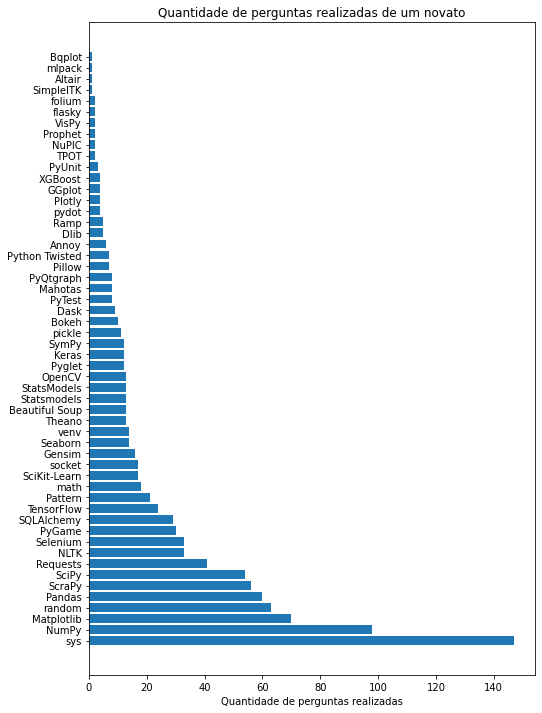

In [30]:
idxFigure = 1
dataResult = dataResult.sort_values(by=['qtd_max_ptgn'])

fig, ax = plt.subplots(figsize=(8, 12))

fig.savefig('./result/{}/{}. qtd_max.png'.format(prefix, idxFigure), dpi=100)

y_pos = np.arange(len(labelRepeat))

ax.barh(y_pos, dataResult['qtd_max_ptgn'].values.tolist(), align='center')
ax.set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
ax.invert_yaxis()
ax.set_title('Quantidade de perguntas realizadas de um novato')
ax.set_xlabel('Quantidade de perguntas realizadas')

plt.show()

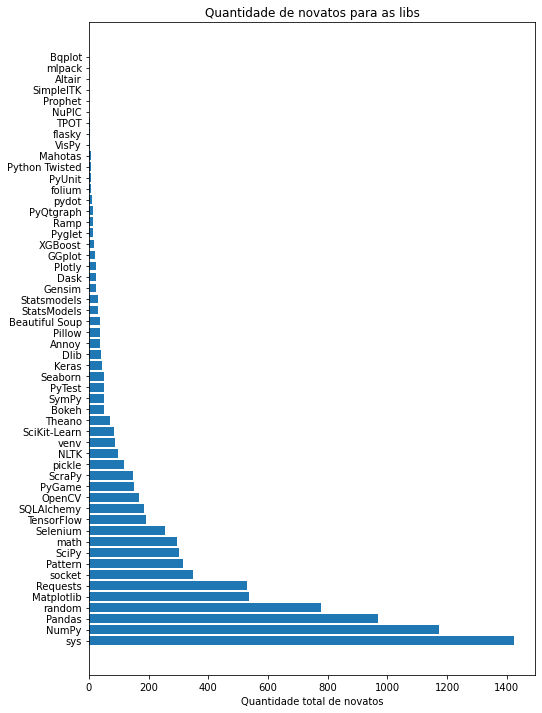

In [31]:
idxFigure = 2
dataResult = dataResult.sort_values(by=['qtd_max_newers'])

fig, ax = plt.subplots(figsize=(8, 12))

fig.savefig('./result/{}/{}. qtd_total.png'.format(prefix, idxFigure), dpi=100)

y_pos = np.arange(len(labelRepeat))

ax.barh(y_pos, dataResult['qtd_max_newers'].values.tolist(), align='center')
ax.set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
ax.invert_yaxis()
ax.set_title('Quantidade de novatos para as libs')
ax.set_xlabel('Quantidade total de novatos')

plt.show()

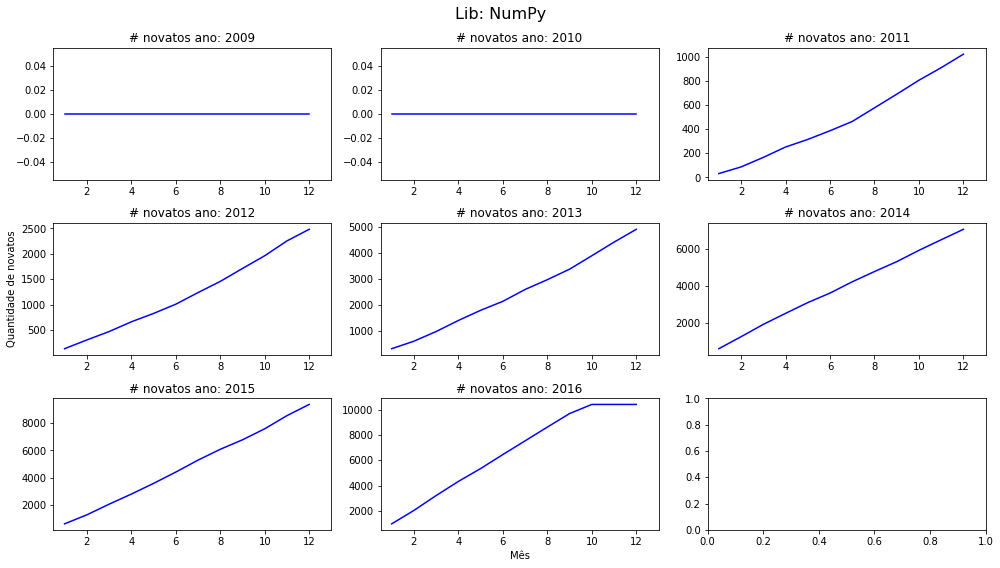

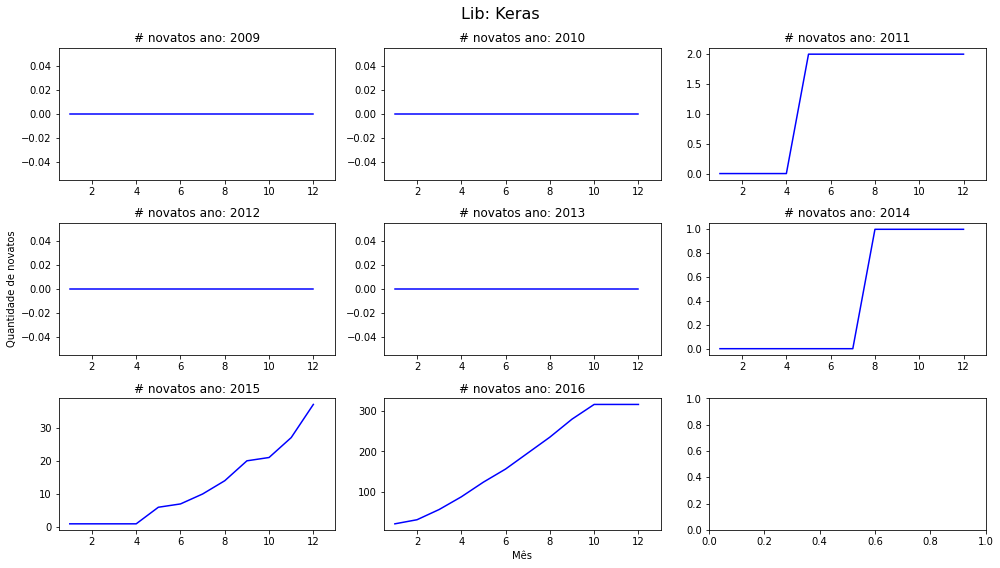

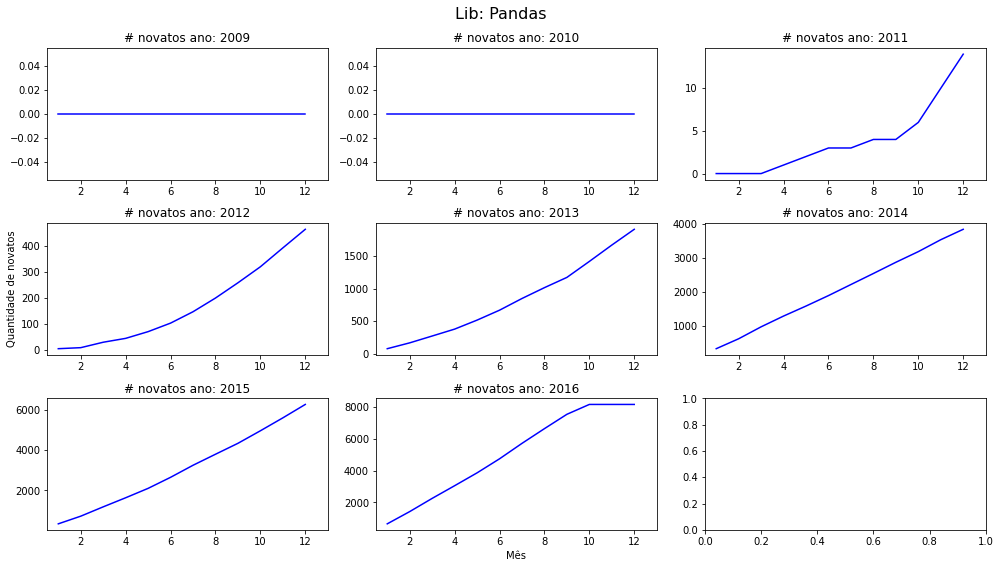

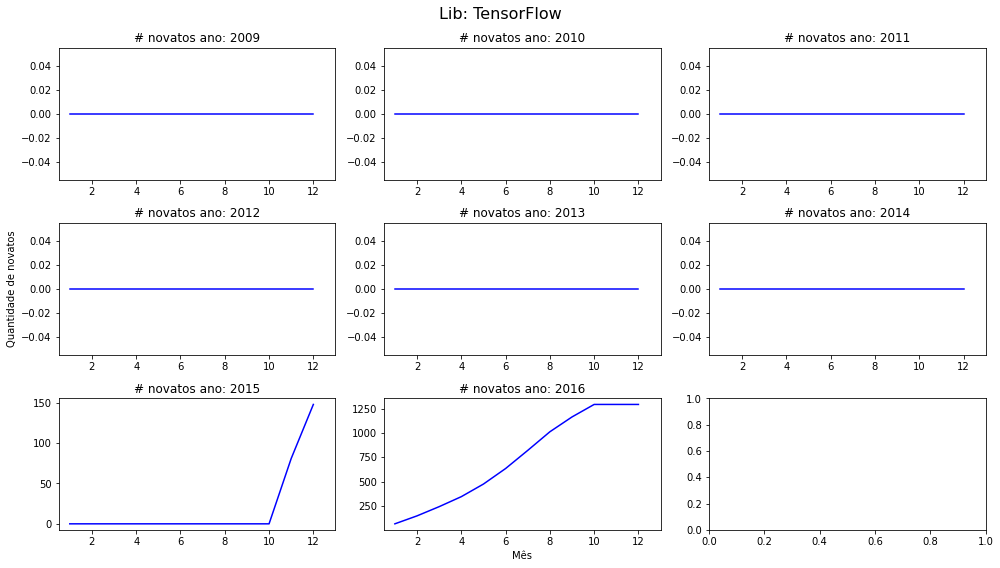

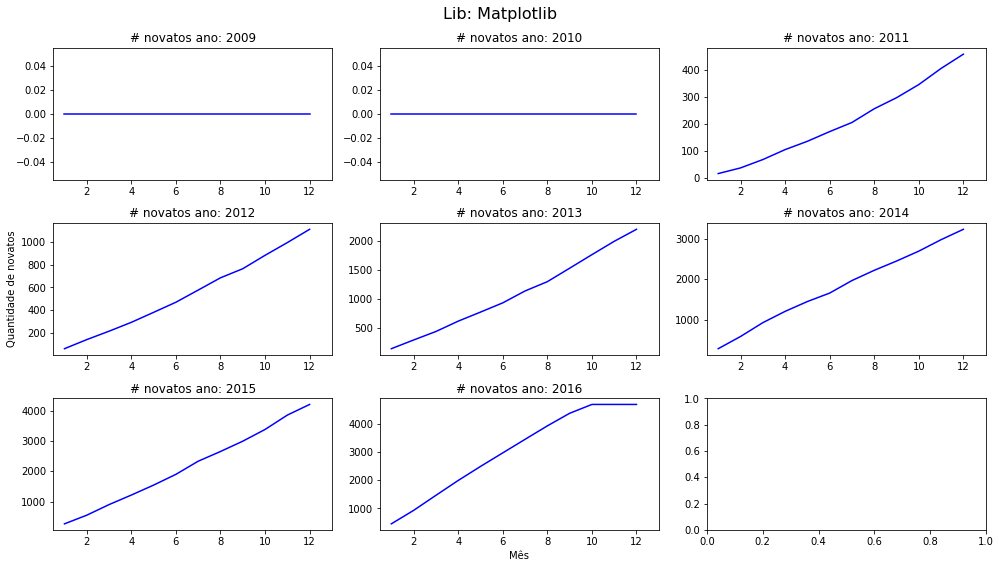

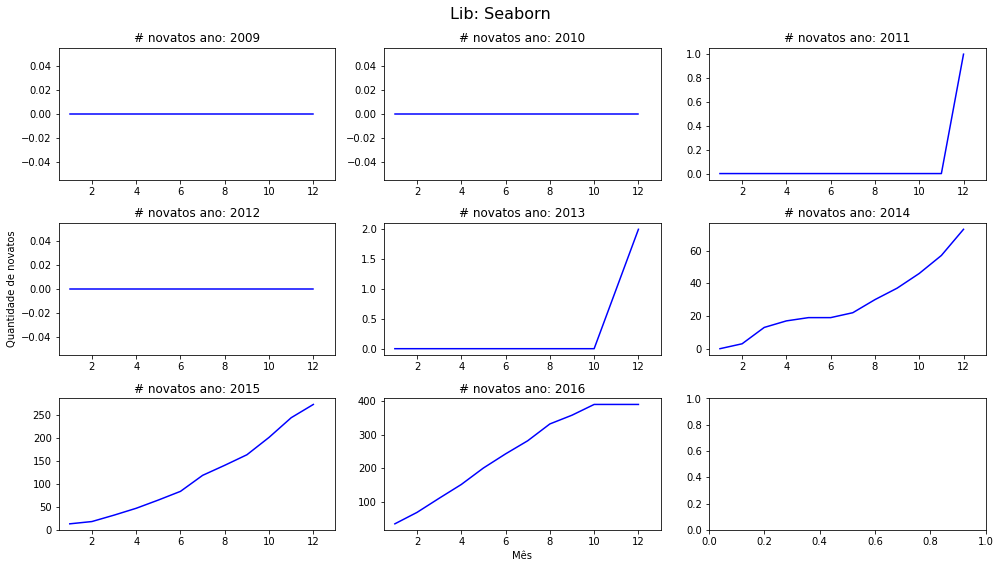

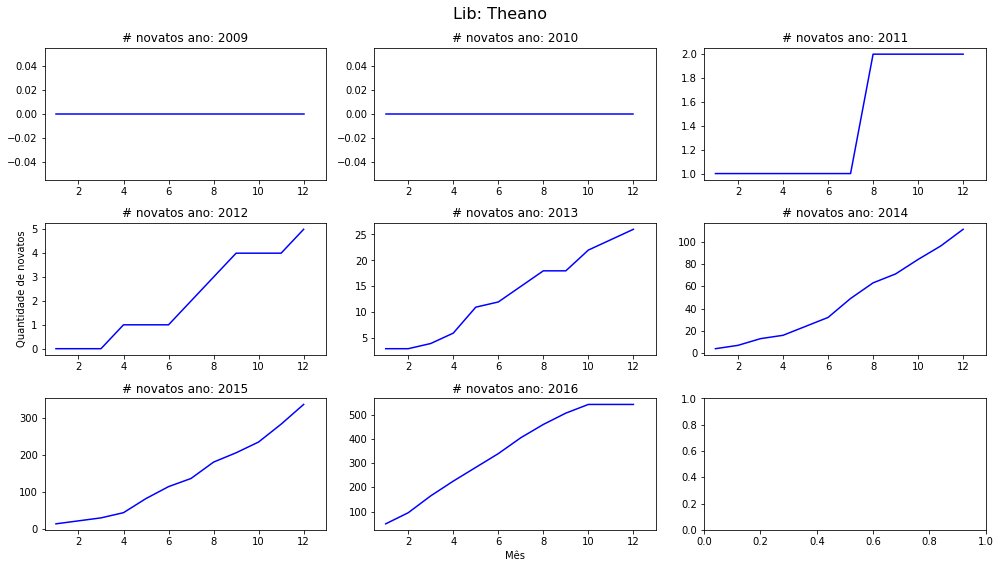

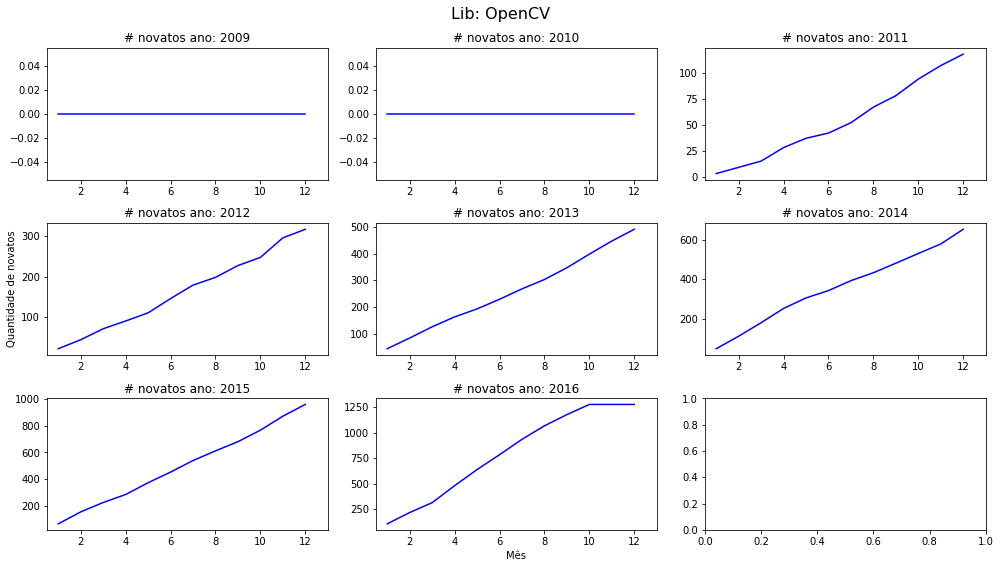

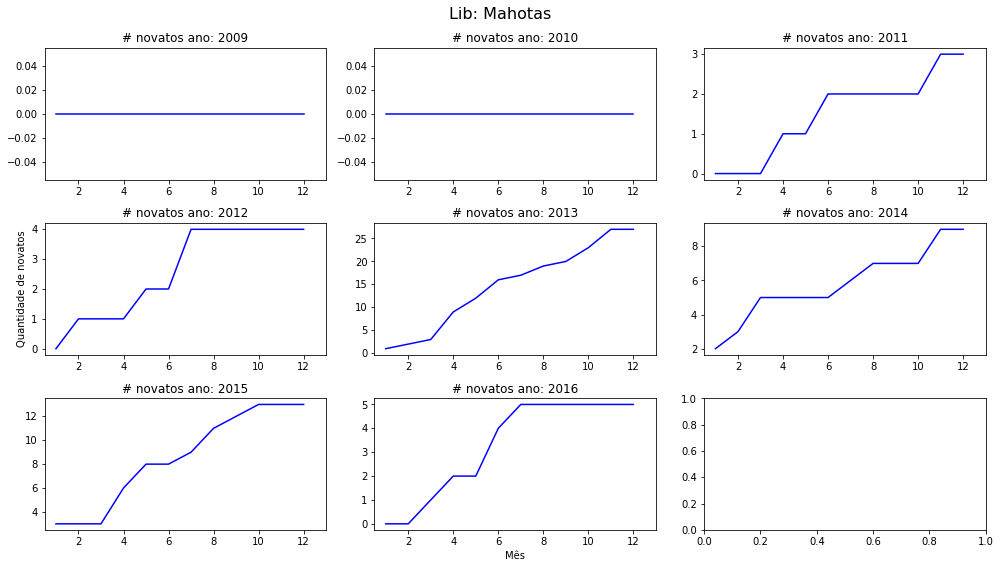

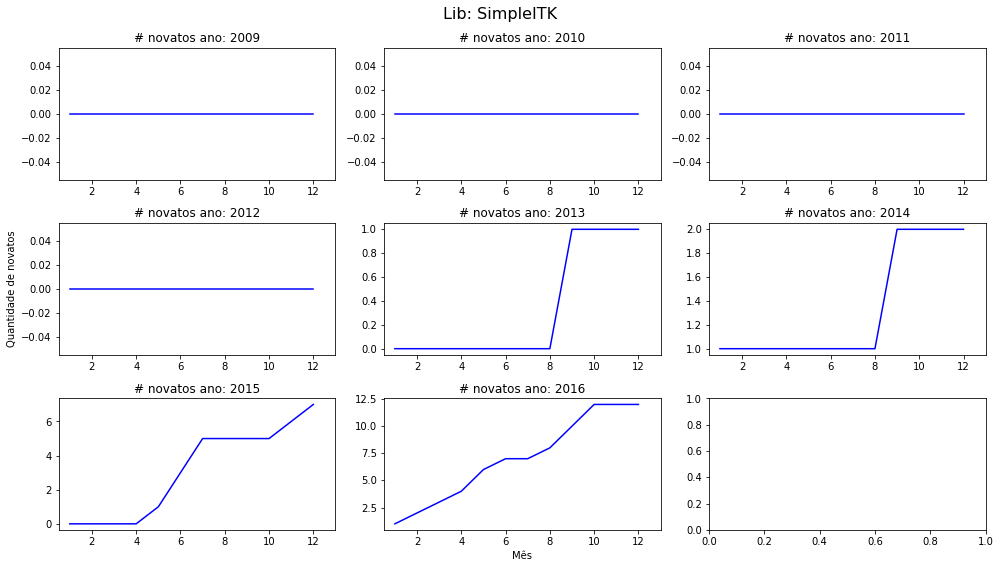

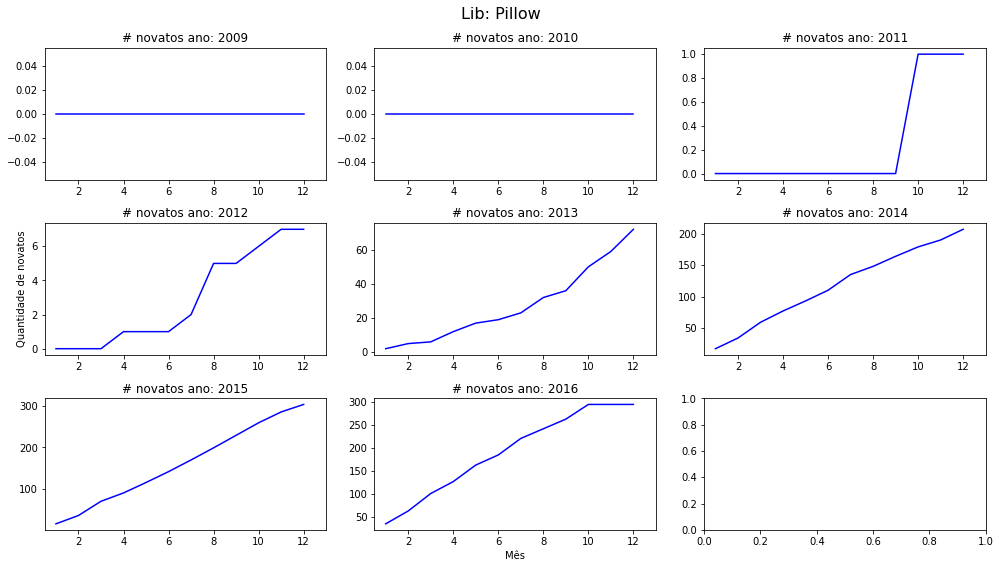

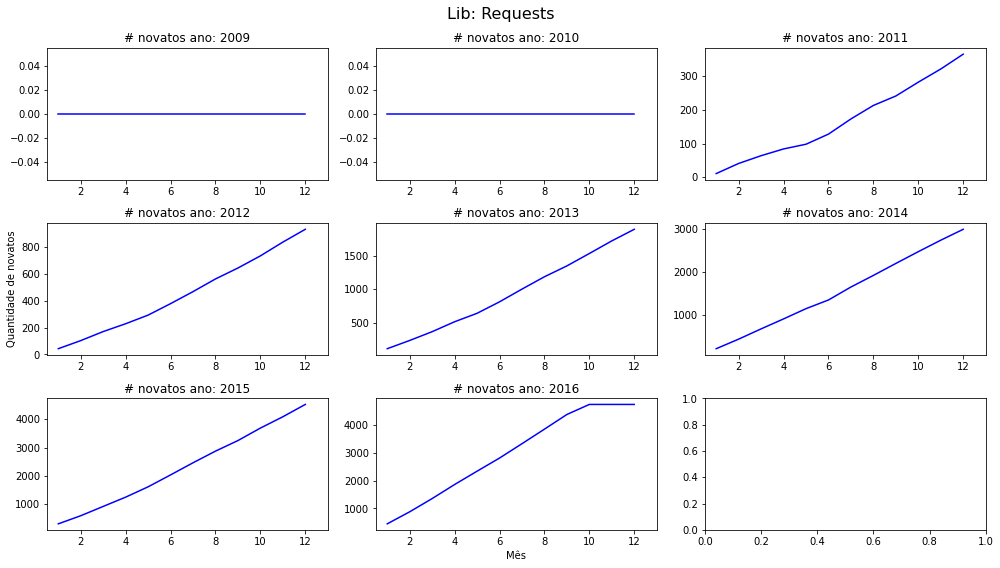

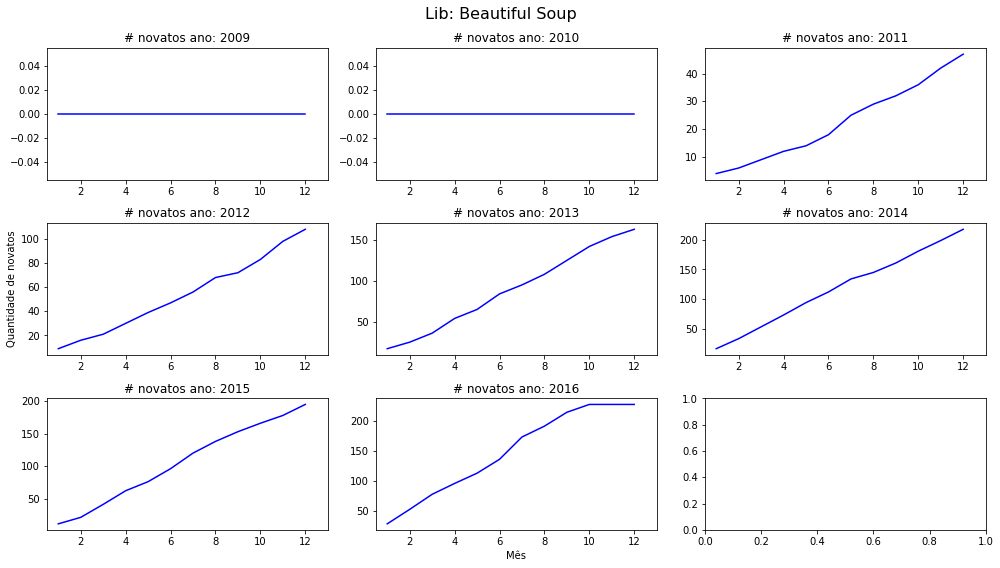

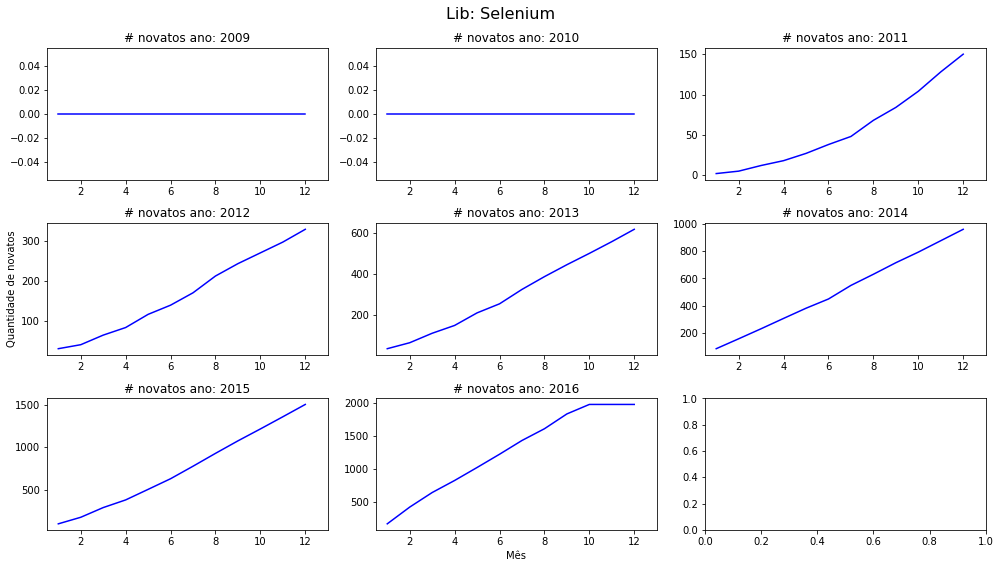

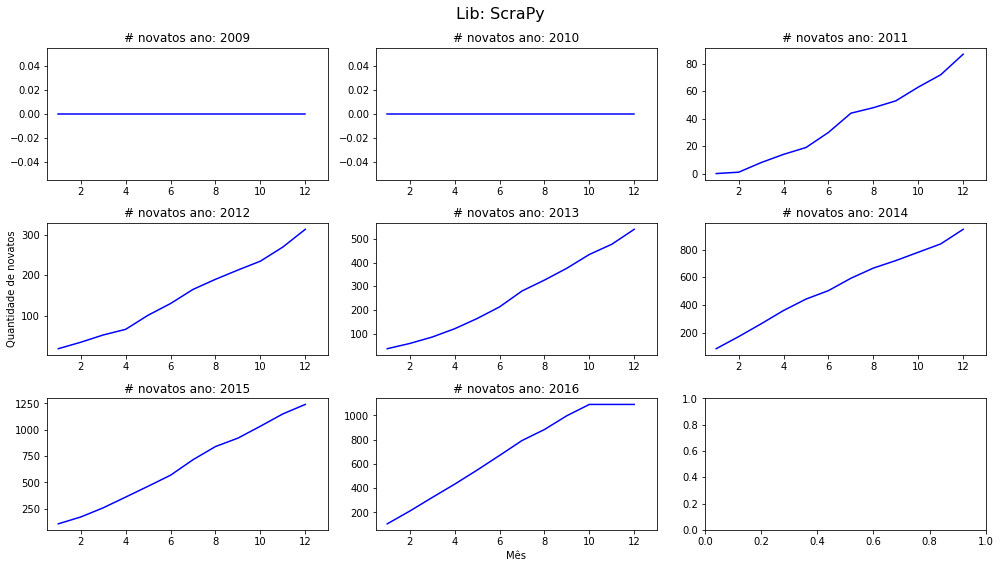

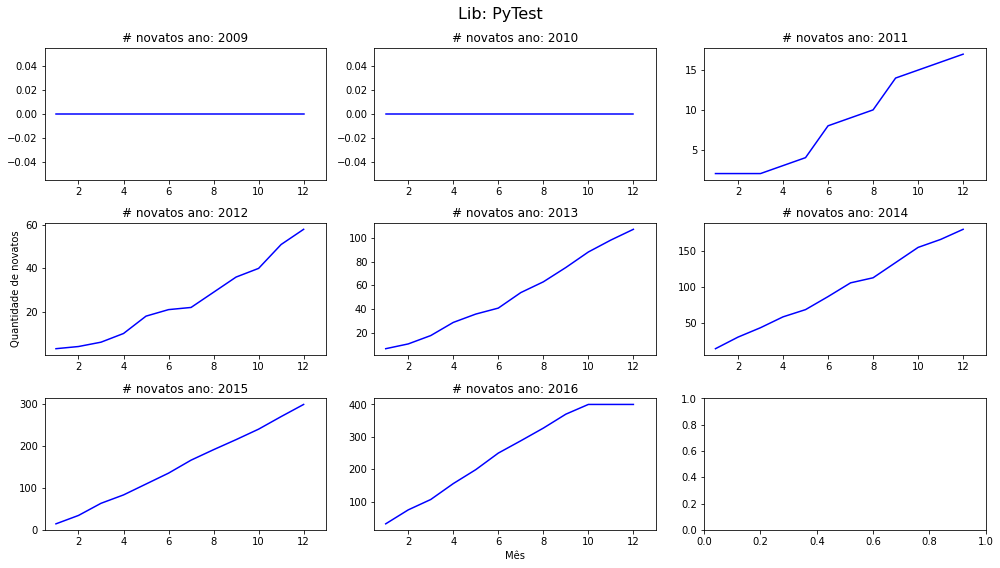

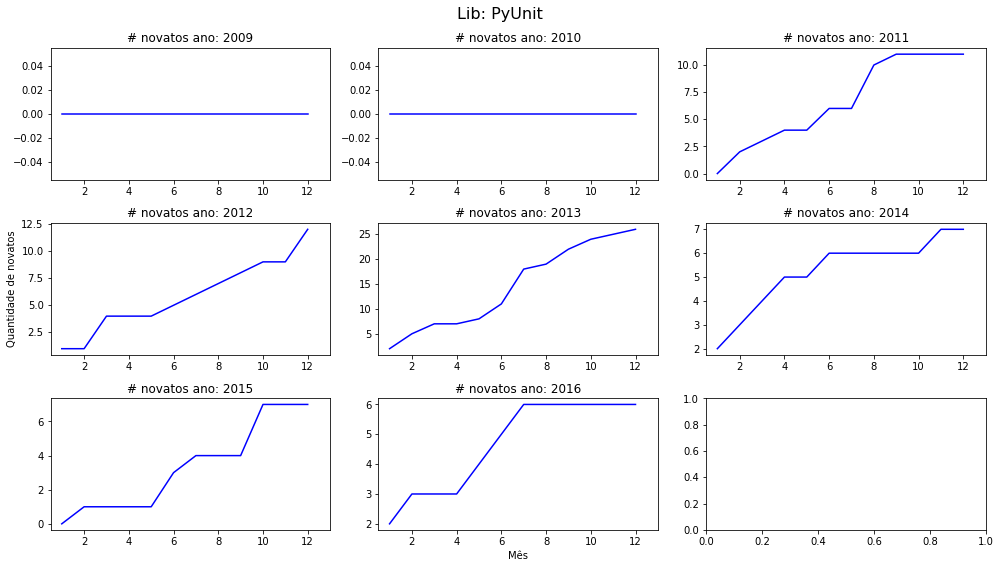

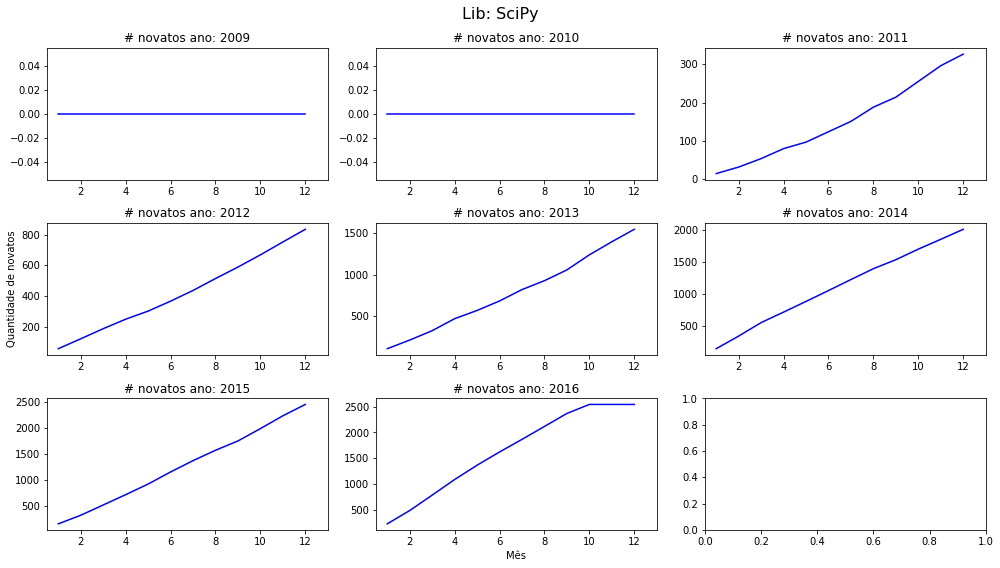

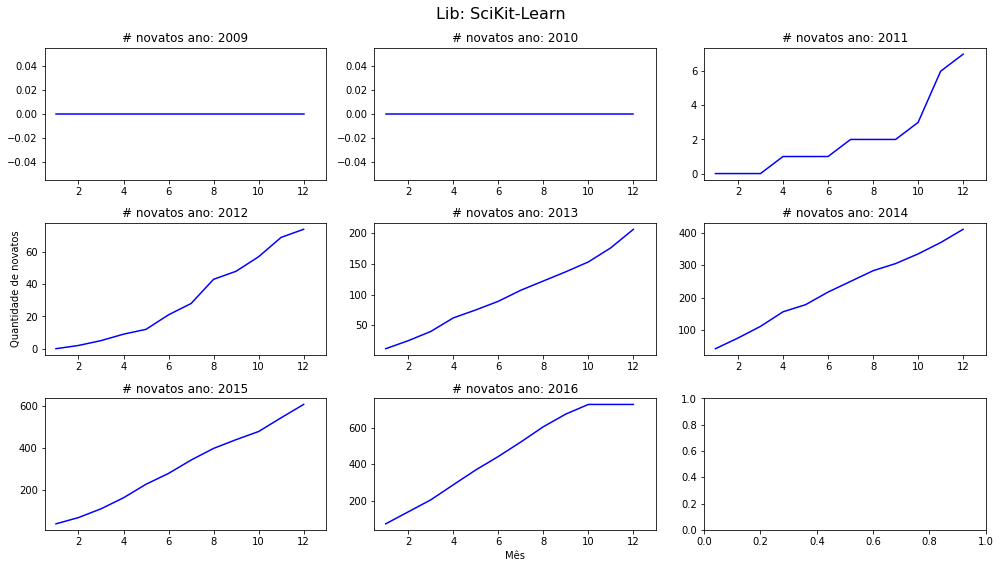

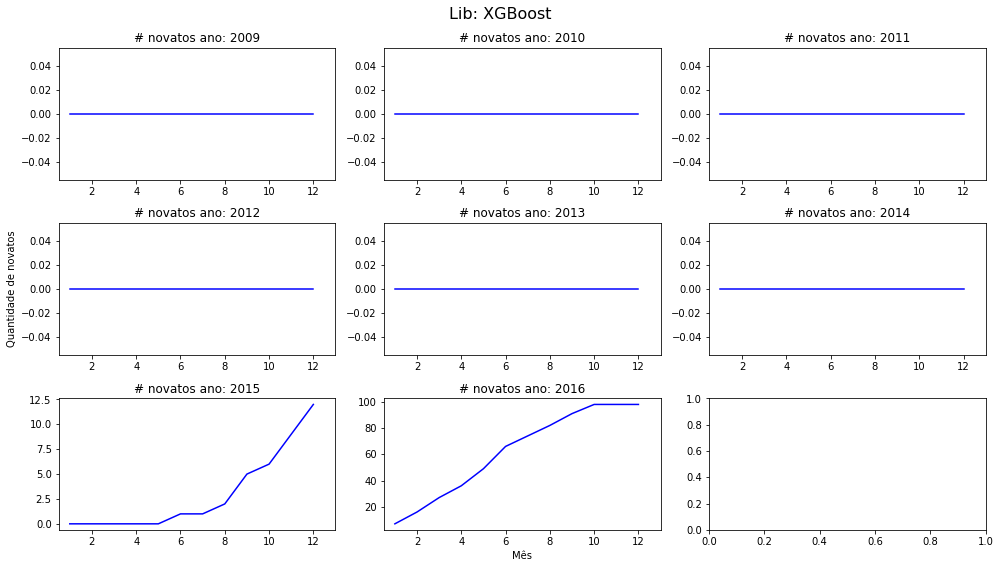

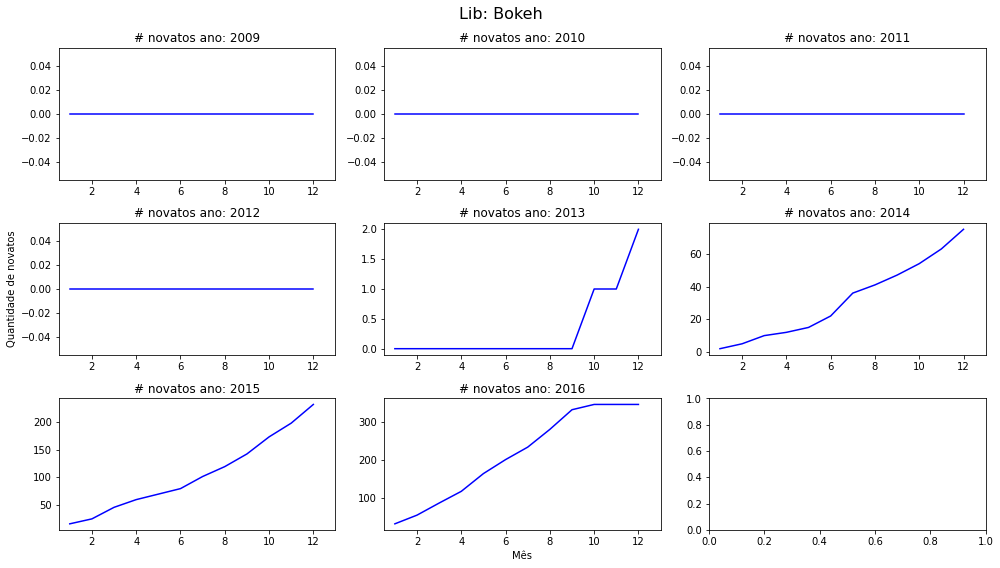

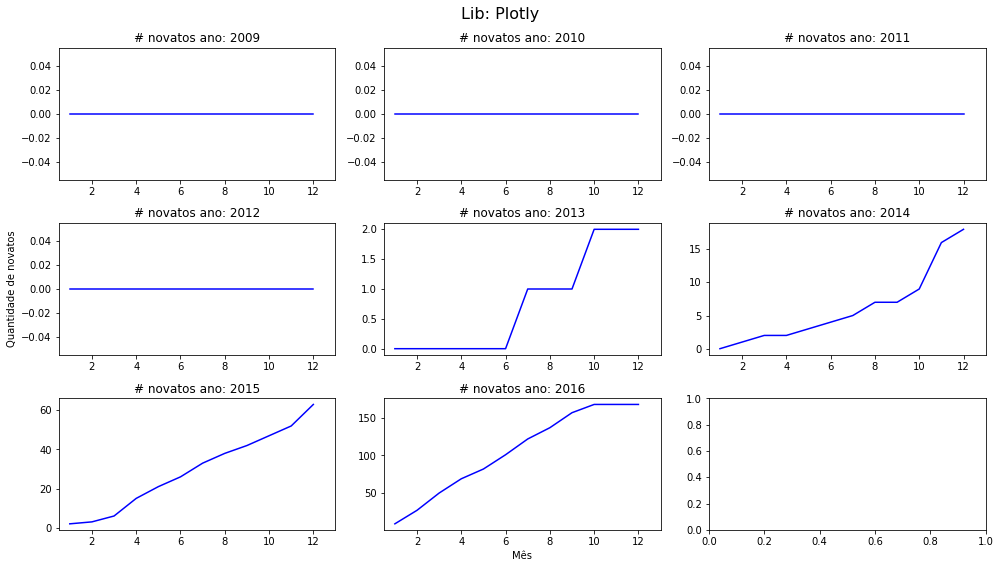

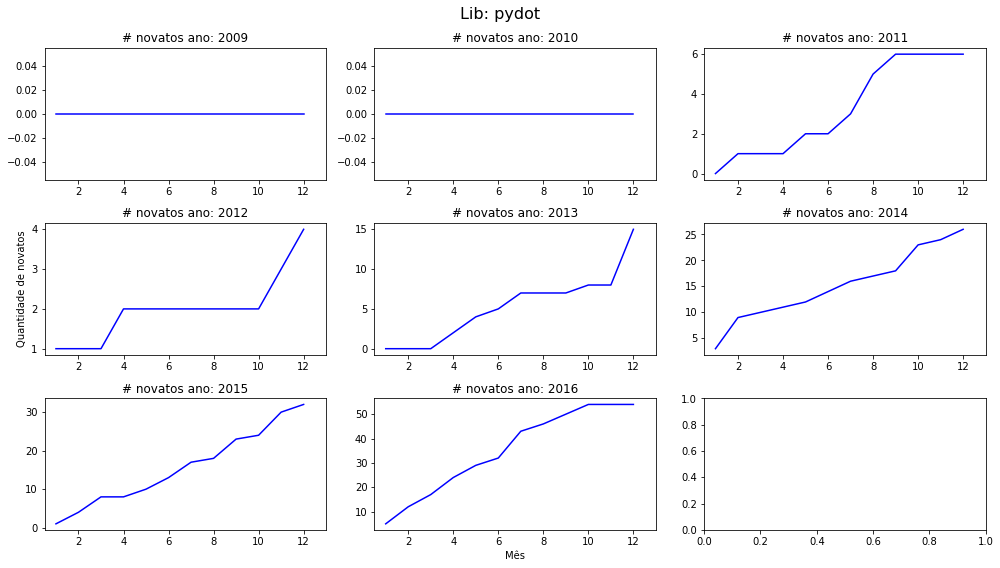

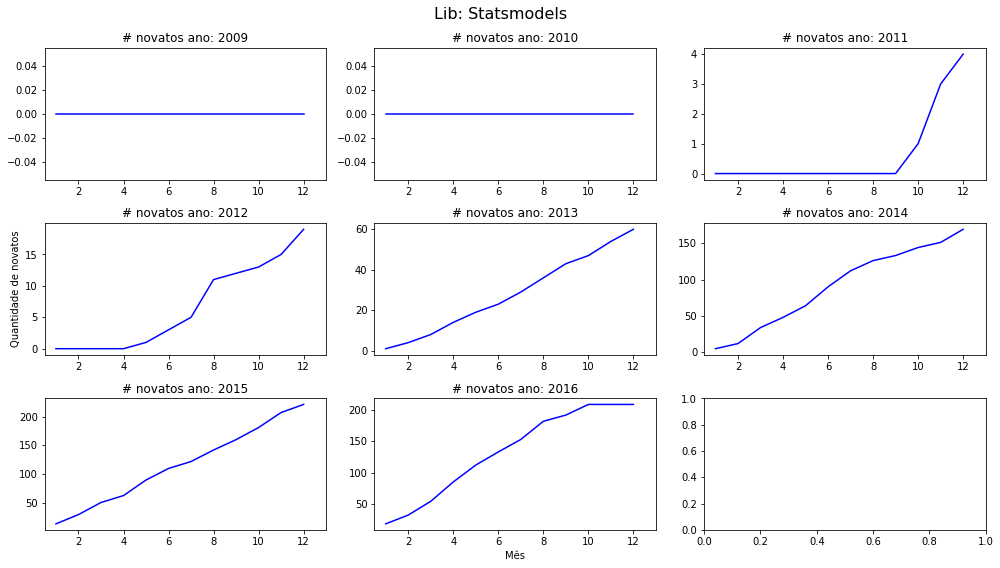

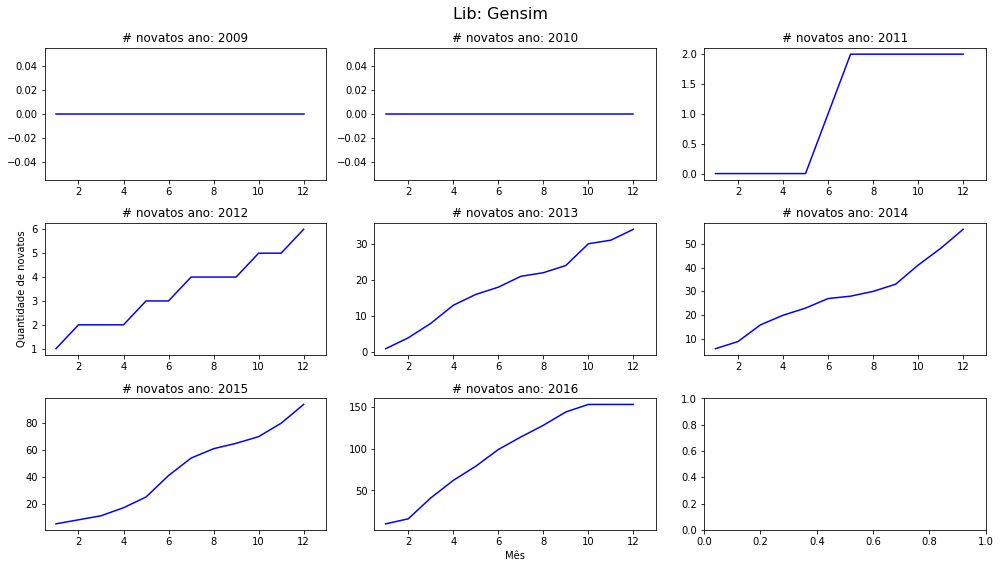

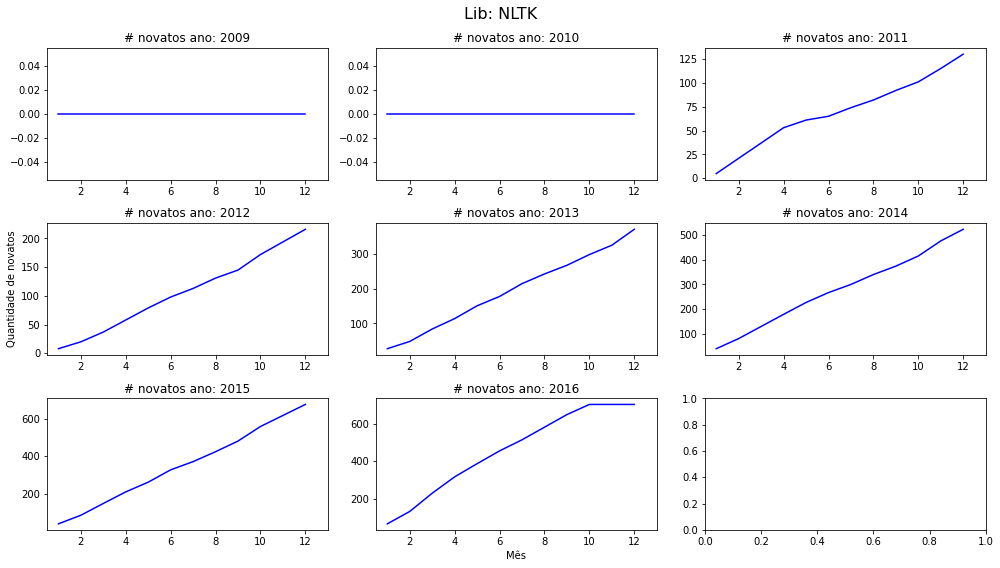

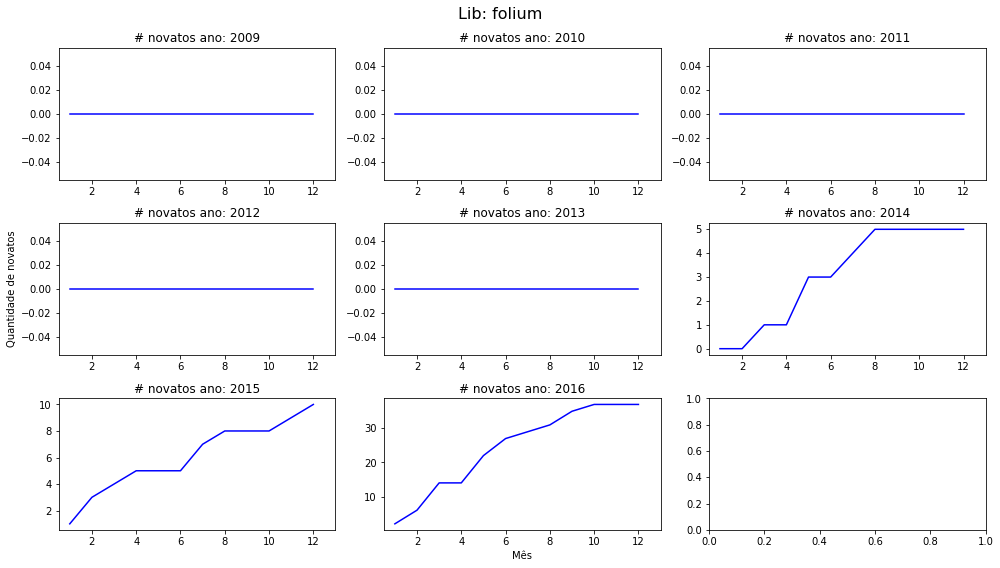

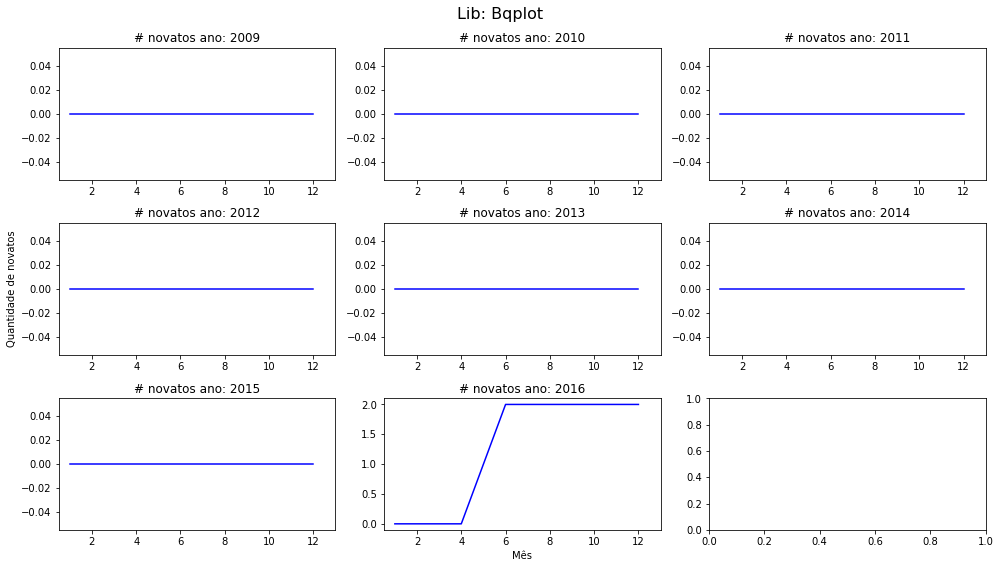

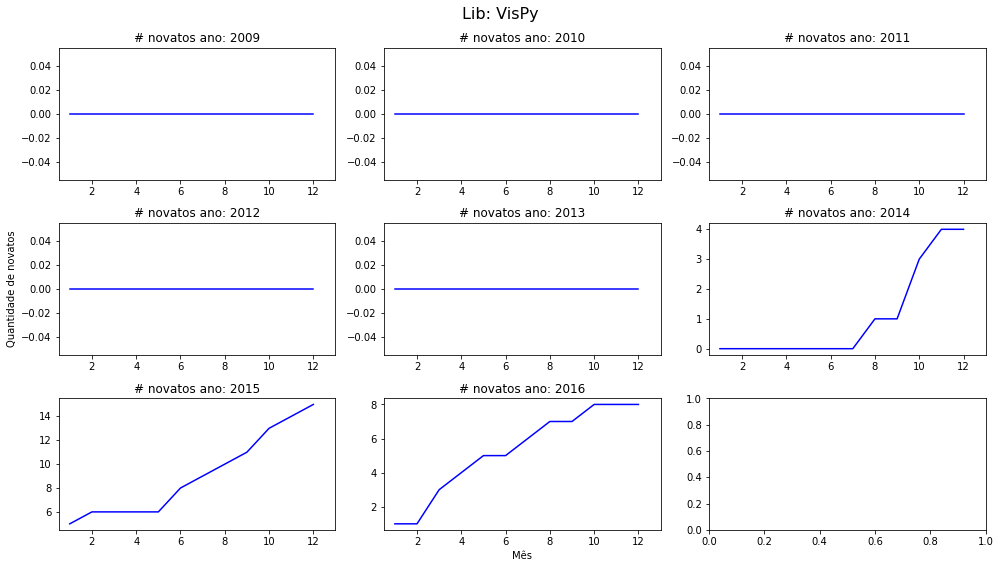

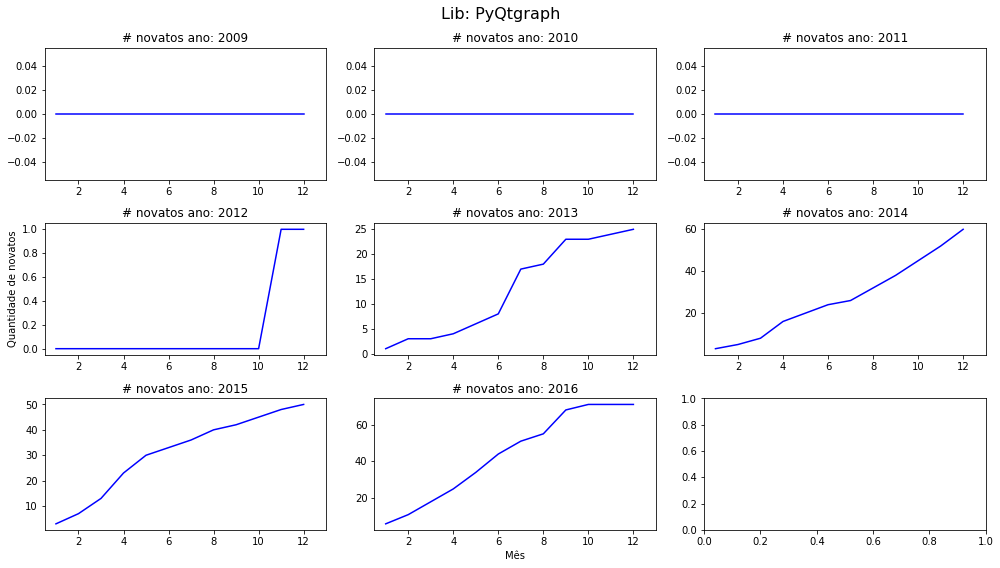

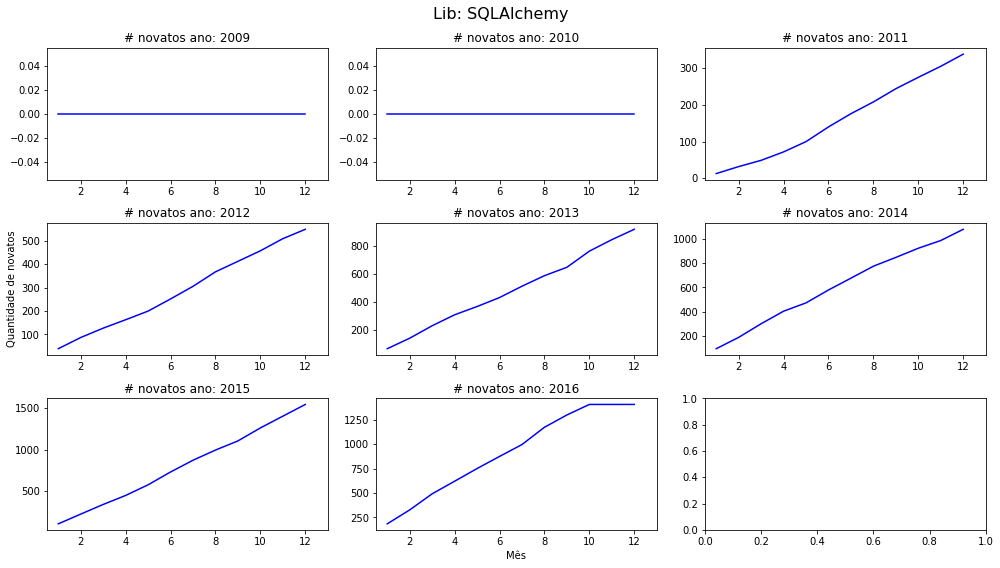

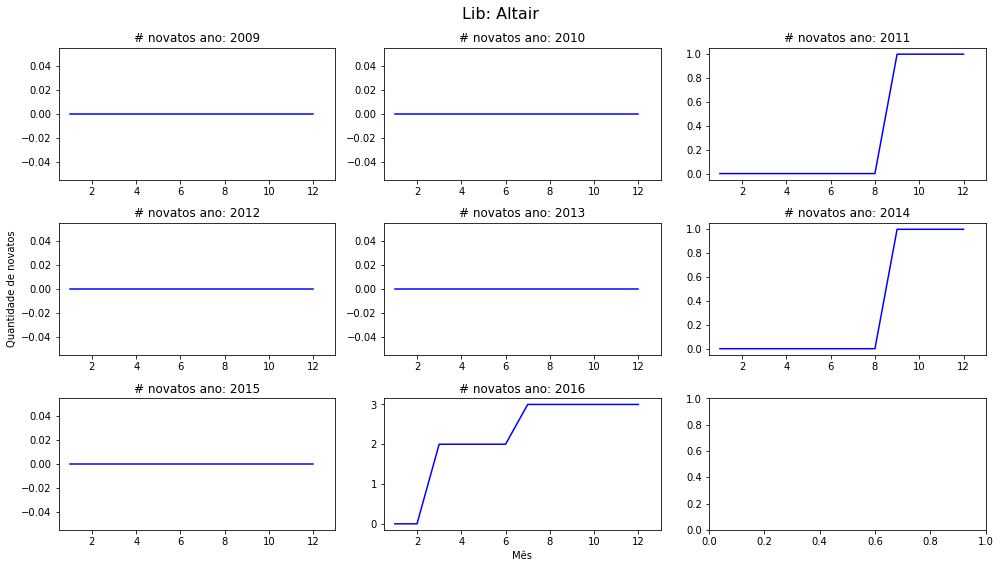

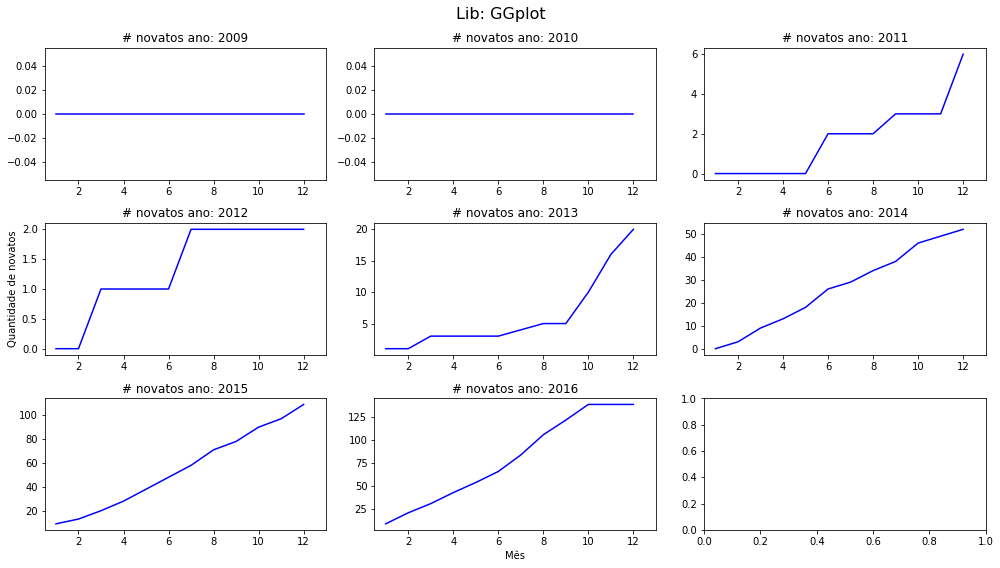

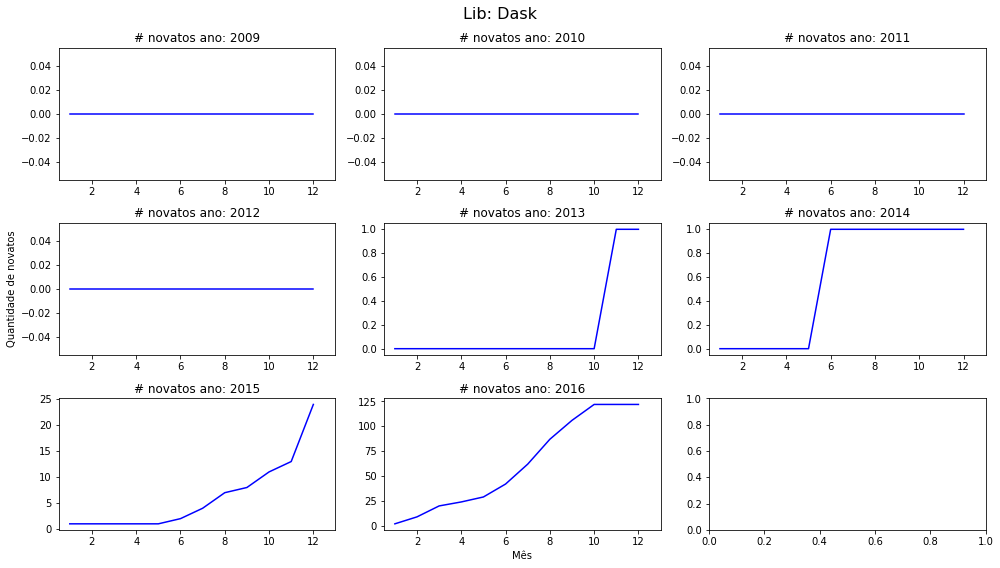

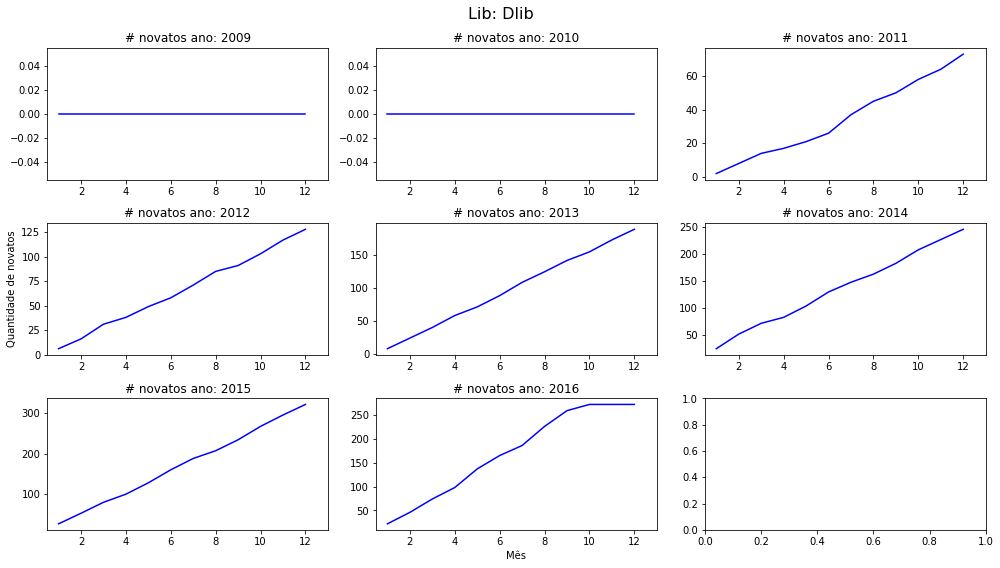

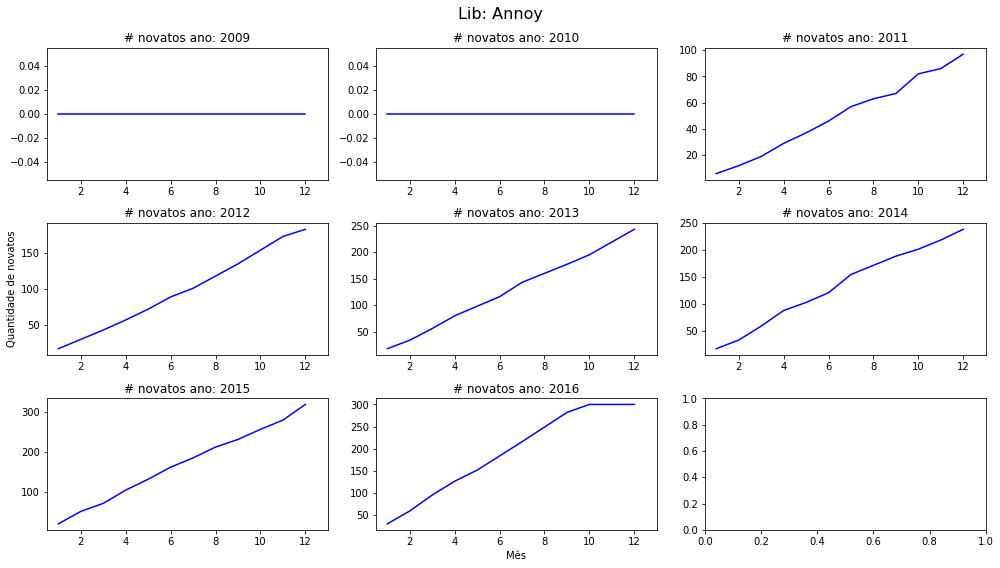

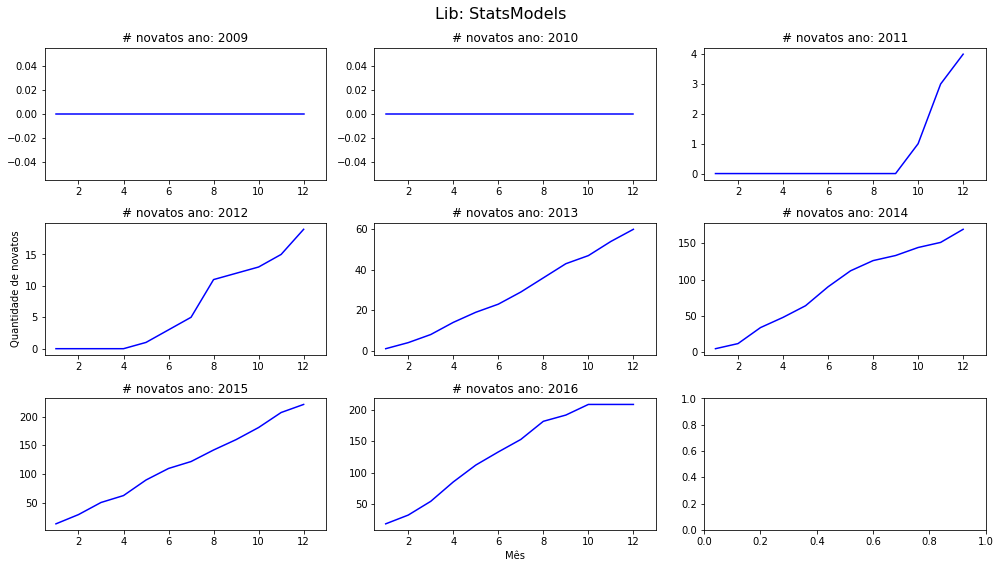

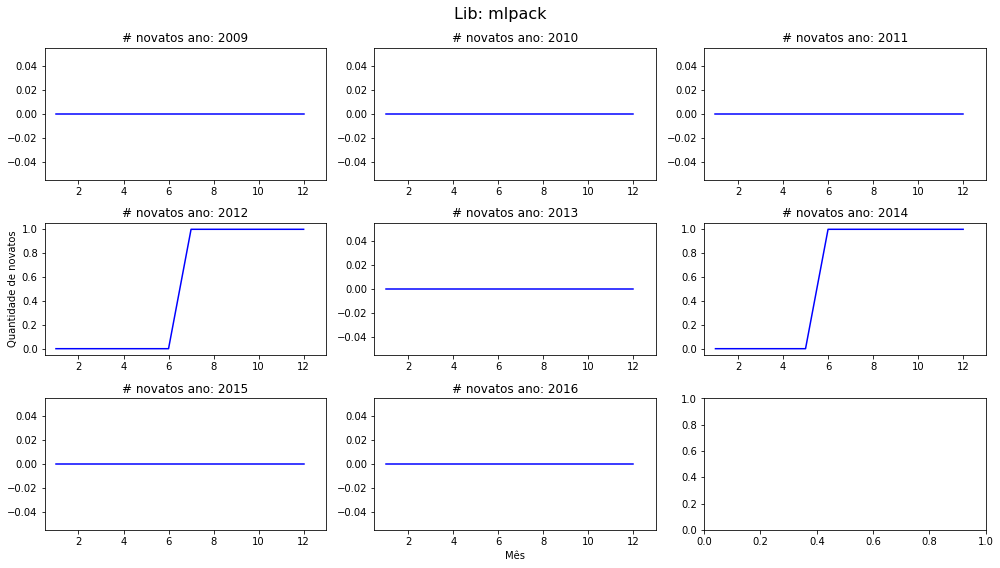

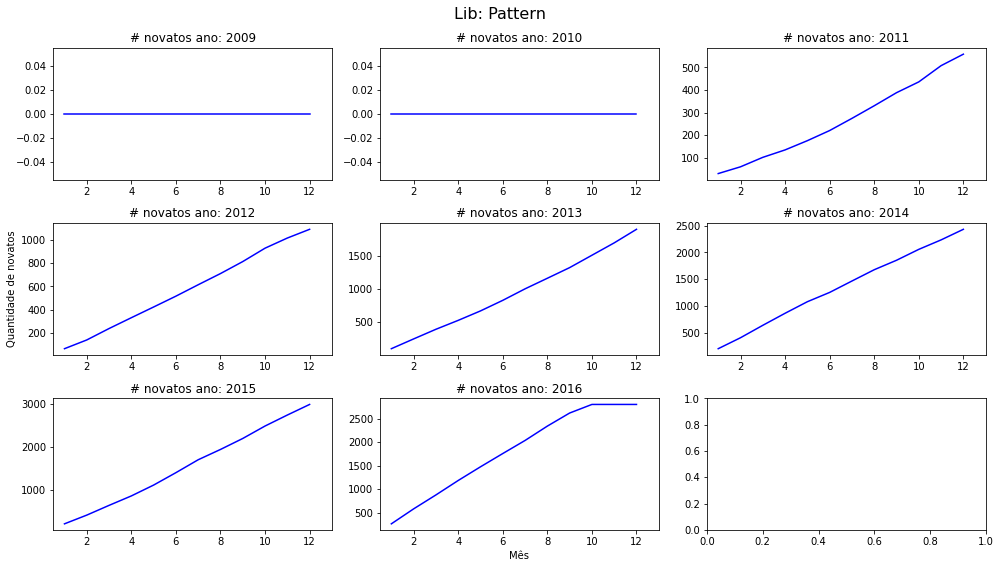

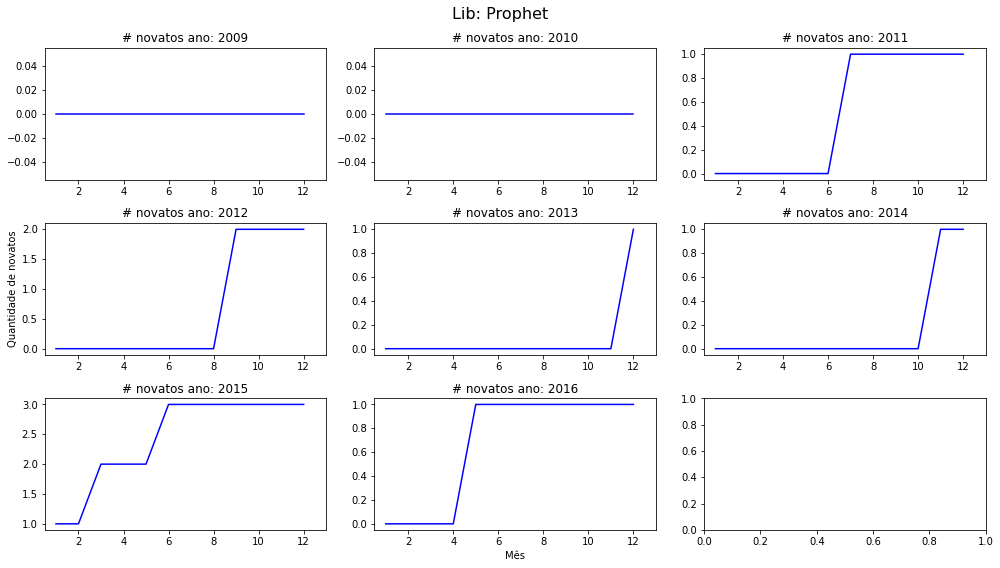

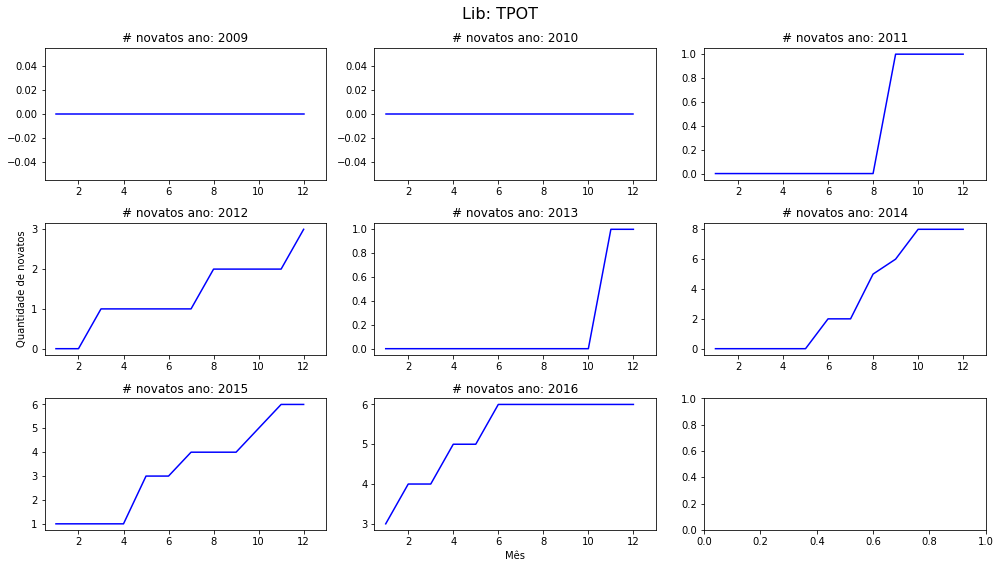

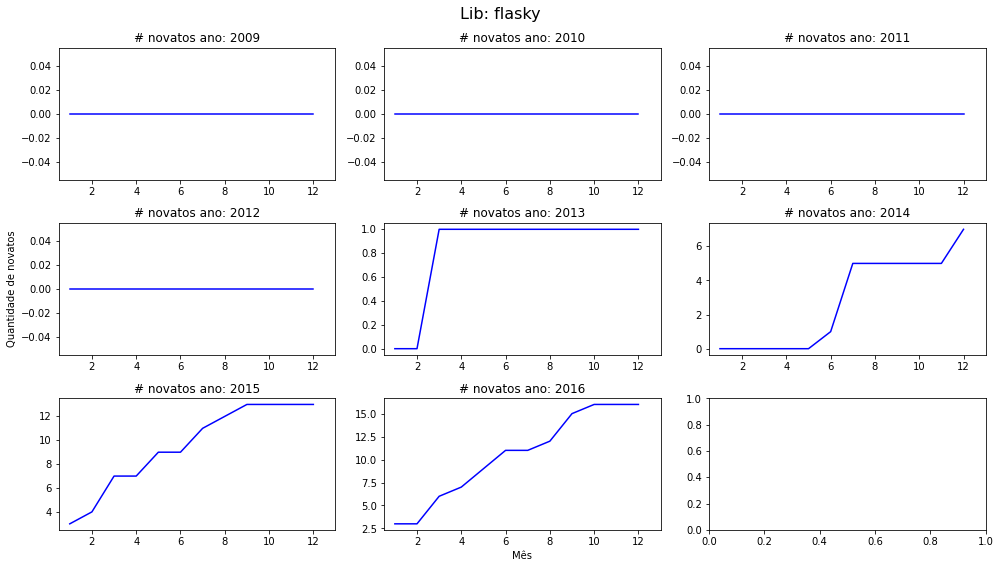

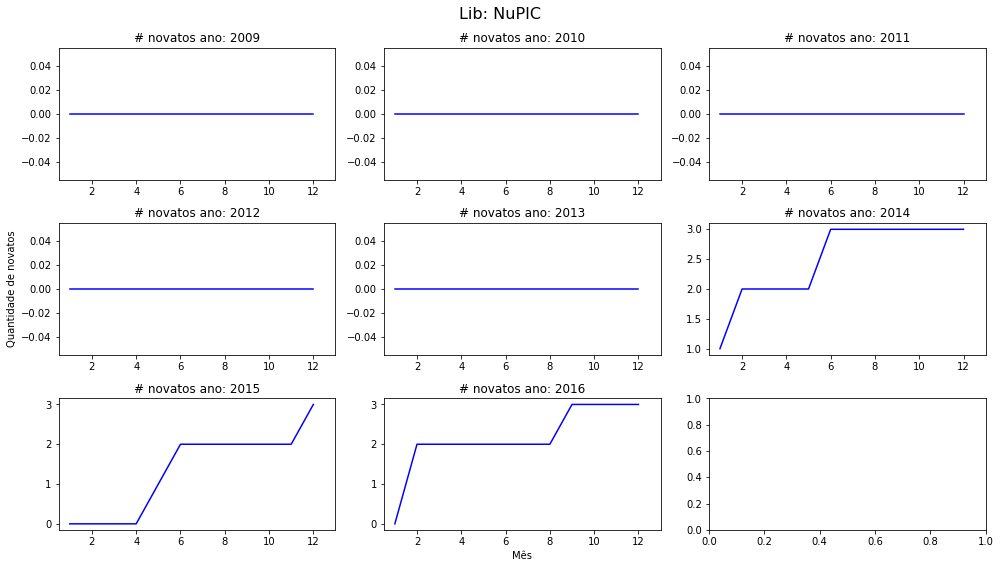

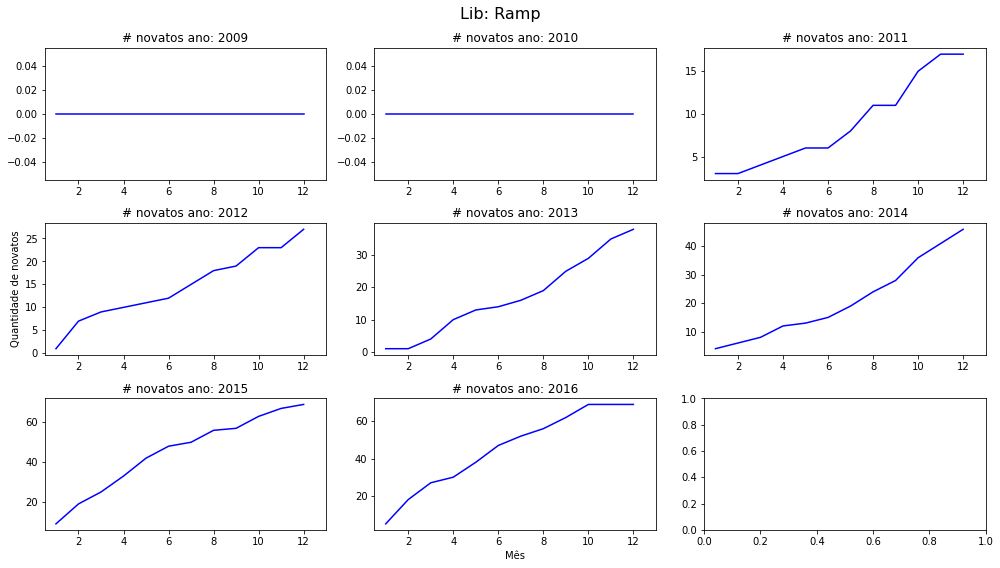

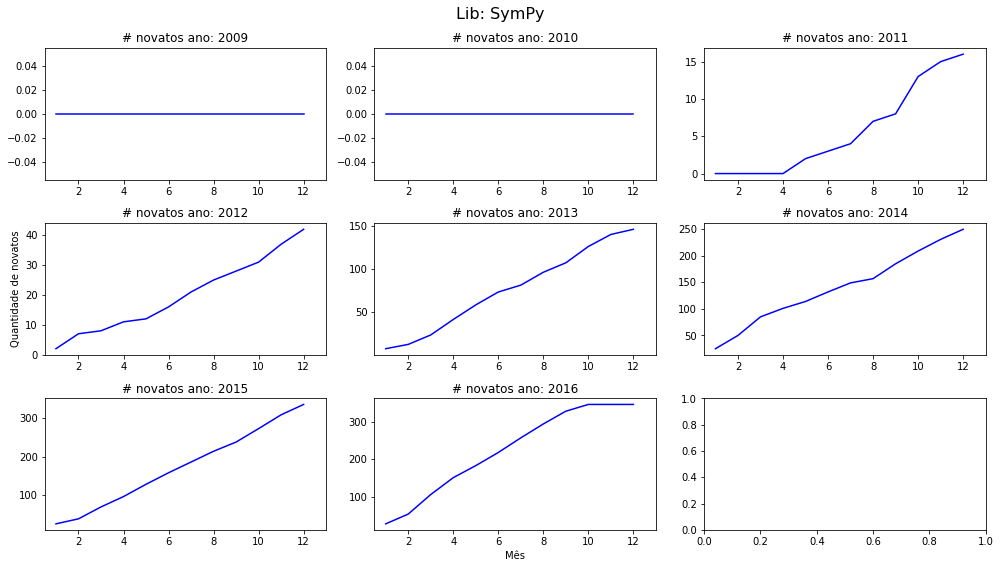

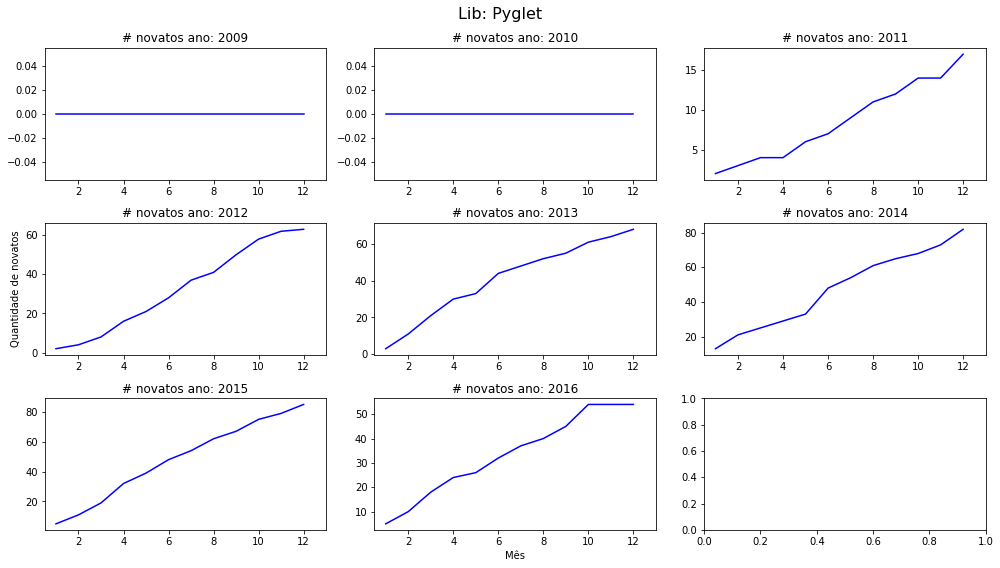

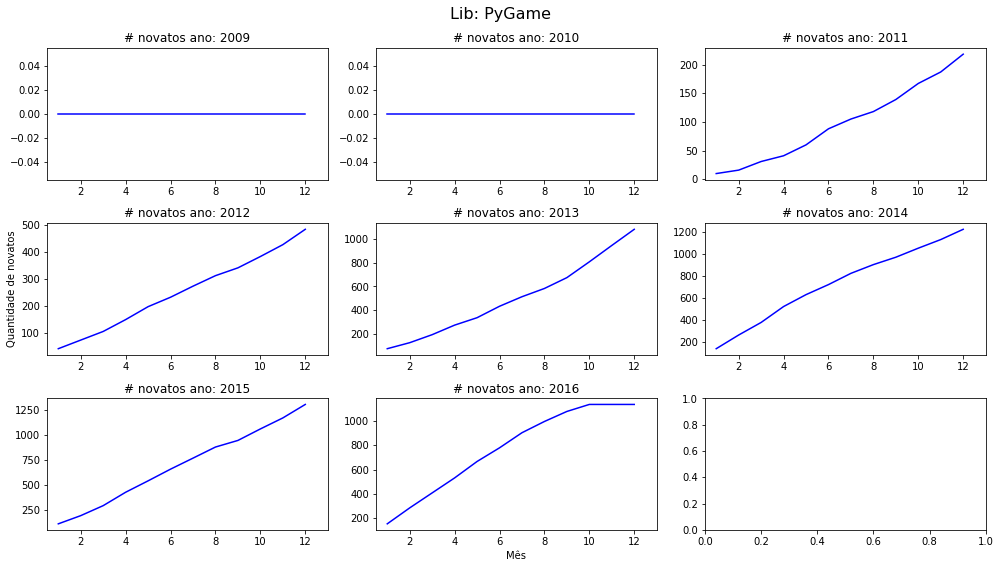

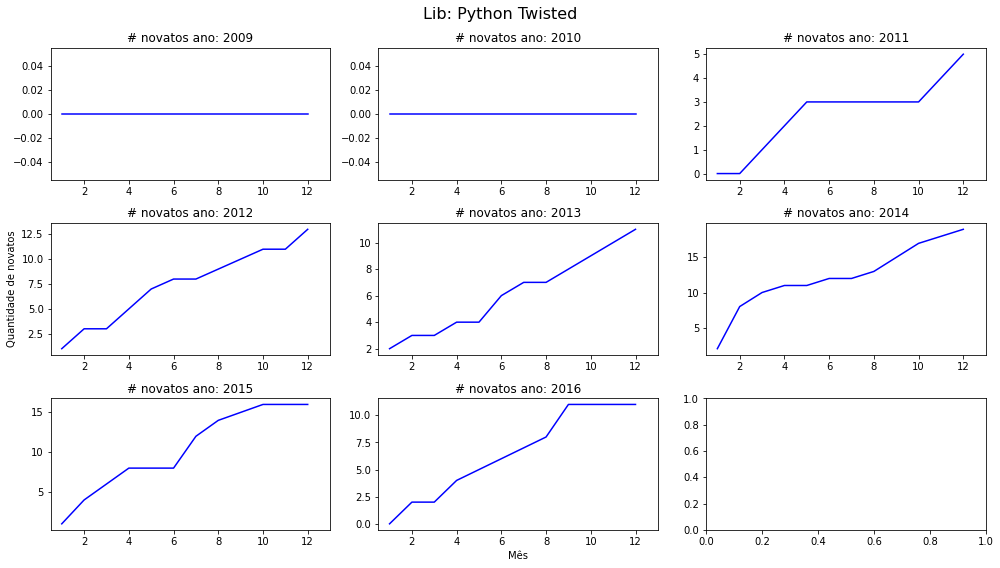

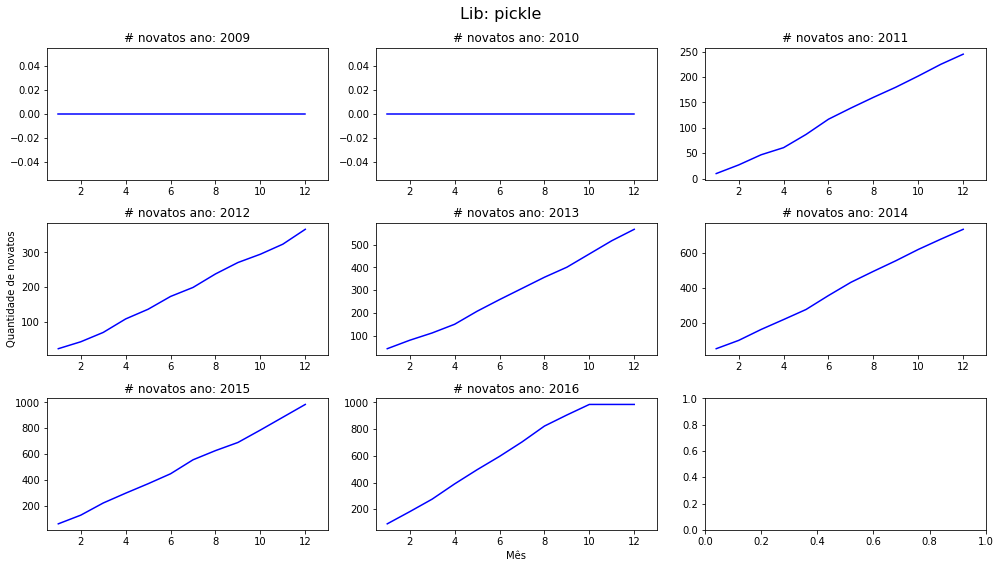

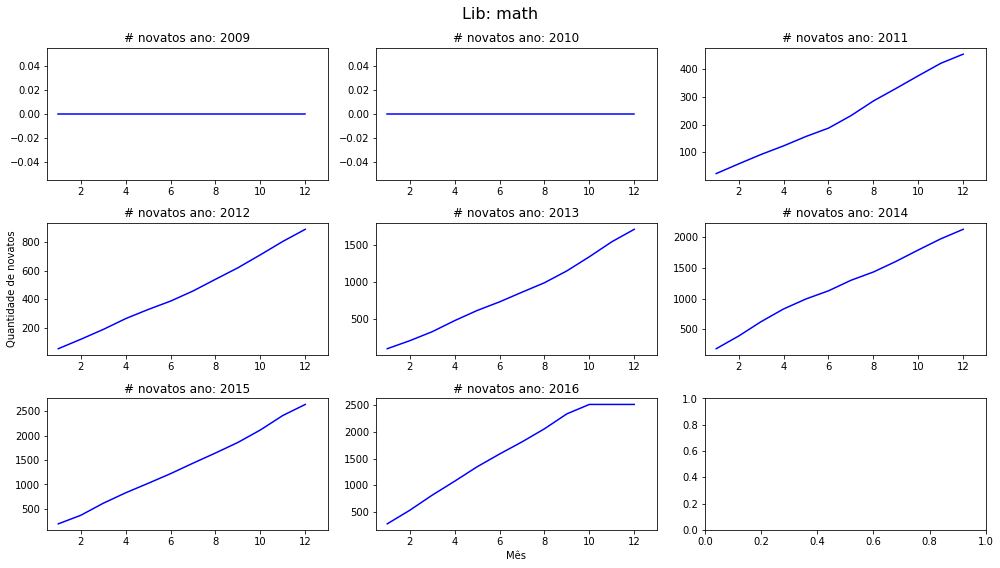

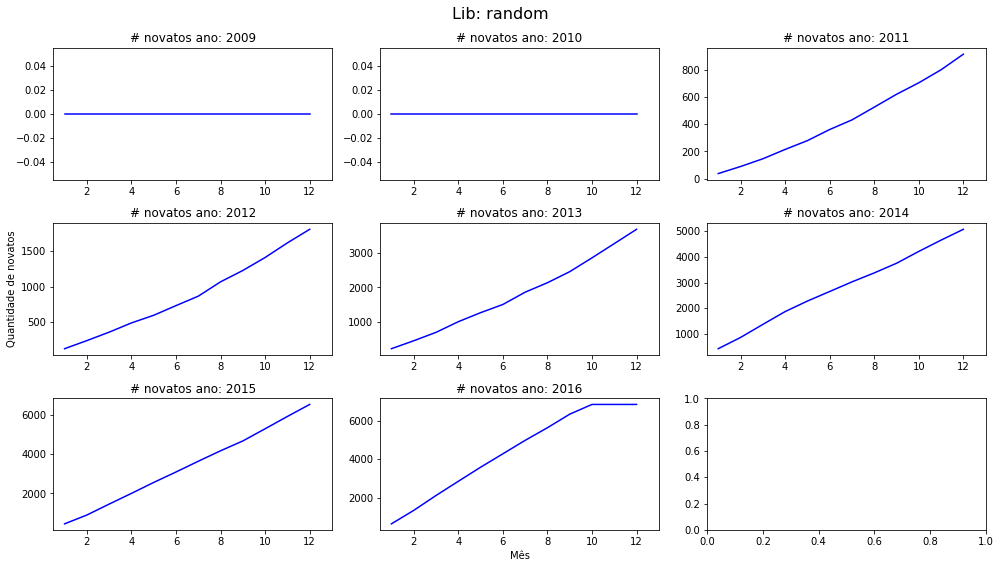

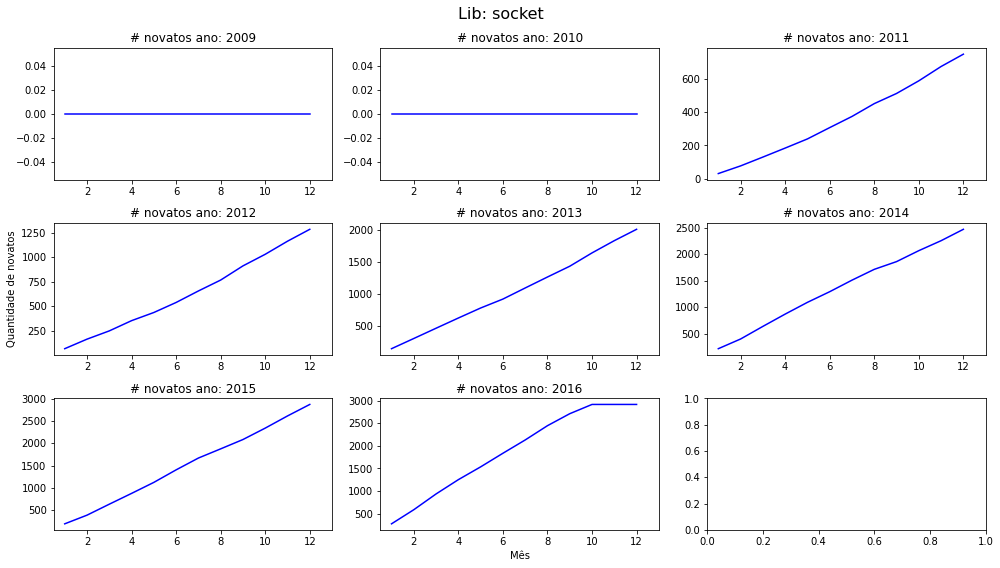

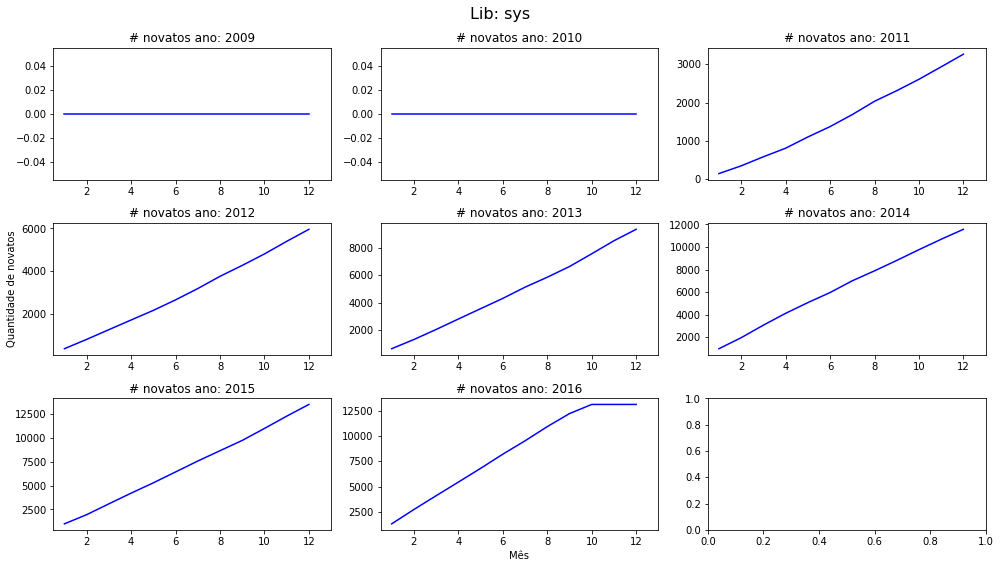

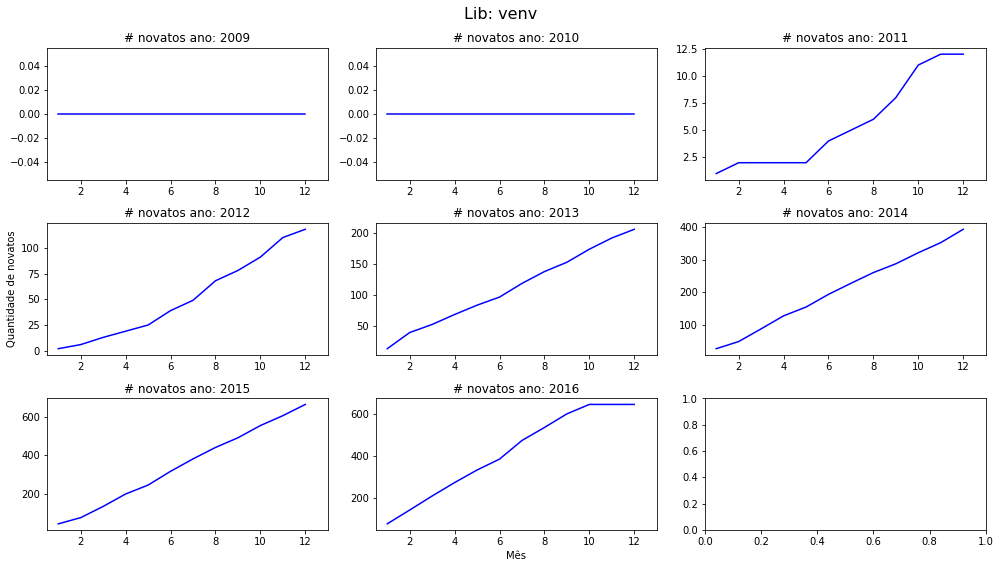

In [17]:
idxFigure = 3
libs = dataLanguage['Lib'].unique().tolist()

for lib in libs:
    dataLib = dataLanguage.loc[dataLanguage['Lib'] == lib]
    anos = dataLib['Year'].unique().tolist()
    
    fig, axs = plt.subplots(3, 3)
    fig.suptitle("Lib: " + lib, fontsize=16)

    fig.set_figwidth(14)
    fig.set_figheight(8)

    idxX = 0
    idxY = 0

    totalBckp = 0

    for ano in anos:
        dataLanguageAno = dataLib.loc[dataLib['Year'] == ano]
        y = sc.returnY(len(dataLanguageAno['Month'].unique().tolist()))
        x = []

        for mes in dataLanguageAno['Month'].unique().tolist():
            dataLanguageMes = dataLanguageAno.loc[dataLanguageAno['Month'] == mes]

            try:
                valueNewCommers = x[-1]
            except:
                valueNewCommers = 0
                # valueNewCommers = totalBckp

            valueNewCommers += dataLanguageMes['NewCommers'].sum()
            totalBckp += dataLanguageMes['NewCommers'].sum()
            x.append(valueNewCommers)

        axs[idxX][idxY].plot(y, x, color='blue')
        
        axs[idxX][idxY].set_title('# novatos ano: {}'.format(ano))

        if idxX == 1 and idxY == 0:
            axs[idxX][idxY].set_ylabel('Quantidade de novatos')
        
        if idxX == 2 and idxY == 1:
            axs[idxX][idxY].set_xlabel('Mês')
        
        axs[idxX][idxY].set_xlim(0.5, 13)

        # plt.ylim(x[0], x[-1] + 10)
        # plt.xlim(-1, 13)
        # plt.title('# novatos por mês para a lib {} no ano {}'.format(lib, ano))
        # plt.ylabel('Quantidade de novatos')
        # plt.xlabel('Mês')
        # plt.show()

        idxY += 1

        if idxY == 3:
            idxY = 0
            idxX += 1
        
    fig.tight_layout()
    plt.show()

    fig.savefig('result/{}/{}. {}_newcommers_years.png'.format(prefix, idxFigure, lib), dpi=fig.dpi, bbox_inches='tight')
    idxFigure += 1